<a href="https://colab.research.google.com/github/Anuragpandey2005/LoanTap_claasification/blob/main/LoanTap_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LoanTap Logistic Regression Case Study

## 🎯 Objective
The objective of this case study is to build a Logistic Regression model to predict whether a loan applicant will **fully repay the loan or default**.  
This will help LoanTap to:  
- Approve loans for the right customers  
- Avoid giving loans to risky customers  
- Reduce NPAs (non-performing assets)  
- Balance between **profit (more approvals)** and **risk (less defaults)**  

---

## 📝 Tasks to Do

### 1. Problem Definition & Exploratory Data Analysis (EDA)
- Import the dataset and check its structure  
- Understand column data types and summary statistics  
- Check missing values and duplicates  
- Perform univariate analysis (distribution of variables)  
- Perform bivariate analysis (relationship of features with target `loan_status`)  
- Check outliers and variable ranges  

### 2. Data Preprocessing
- Handle missing values  
- Treat outliers if required  
- Encode categorical variables  
- Create new features (flags like `pub_rec_flag`, `mort_acc_flag`, `bankruptcy_flag`)  
- Apply feature scaling (StandardScaler / MinMaxScaler)  

### 3. Model Building (Logistic Regression)
- Split dataset into Train and Test sets  
- Build Logistic Regression model  
- Check model coefficients and interpret them  

### 4. Model Evaluation
- Generate Classification Report (Accuracy, Precision, Recall, F1-score)  
- Plot Confusion Matrix  
- Plot ROC-AUC Curve  
- Plot Precision-Recall Curve  
- Discuss Precision vs Recall trade-off  

### 5. Business Questions / Trade-offs
- How to reduce false positives (approve safe borrowers)?  
- How to improve recall (catch real defaulters)?  
- How to balance between NPAs and Profitability?  

### 6. Actionable Insights & Recommendations
- Identify top features impacting loan repayment  
- Suggest changes in loan approval policy  
- Provide risk vs reward strategy for LoanTap  

---

## 📌 Questionnaire to Answer
1. What percentage of customers have fully paid their Loan Amount?  
2. Correlation between Loan Amount and Installment features.  
3. Majority home ownership type.  
4. People with grade 'A' are more likely to pay fully (True/False).  
5. Top 2 afforded job titles.  
6. Primary metric for bank: ROC AUC / Precision / Recall / F1 Score.  
7. How precision-recall gap affects the bank.  
8. Features that strongly impact outcome.  
9. Will geographical location affect results? (Yes/No)  


In [ ]:
import gdown

# Shared link of your file:
url = 'https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view?usp=sharing'

# Extract file ID manually (1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d)
file_id = '1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d'
downloaded = gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'LoanTapData.csv', quiet=False)

import pandas as pd
df = pd.read_csv('LoanTapData.csv')
df.head()


Downloading...
From: https://drive.google.com/uc?export=download&id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/LoanTapData.csv
100%|██████████| 100M/100M [00:00<00:00, 101MB/s] 


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("LoanTapData.csv")

# 🔹 Check if there are any duplicate rows
print(df.duplicated().sum())

# 🔹 Display duplicate rows (if you want to see them)
df[df.duplicated()]

0


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


**THERE IS NO DUPLICATE COLUMN**

In [ ]:
# Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

#### Checking the null columns

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


# 📊 Columns with Missing Values in LoanTap Dataset

| Column Name           | Missing Values Count |
|-----------------------|-----------------------|
| emp_title             | 22,927               |
| emp_length            | 18,301               |
| title                 | 1,756                |
| revol_util            | 276                  |
| mort_acc              | 37,795               |
| pub_rec_bankruptcies  | 535                  |


# Univariate Analysis
- First I will Treat the columns With NaN Values

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>]], dtype=object)

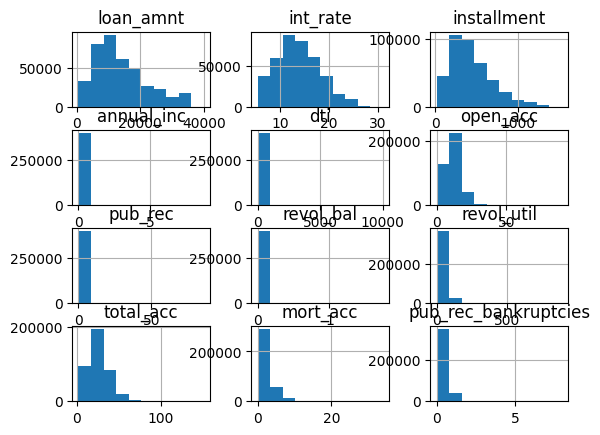

In [ ]:
df.hist()

#### For `emp_title`
- Missing Values : 22,927

/tmp/ipython-input-339040344.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")


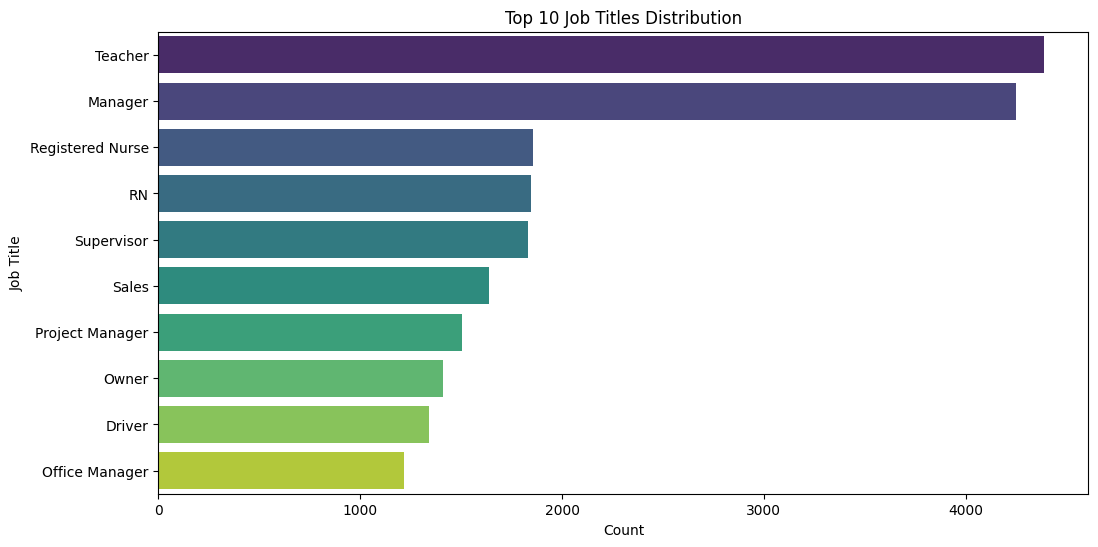

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most frequent job titles
top_titles = df['emp_title'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")

plt.title("Top 10 Job Titles Distribution")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

In [ ]:
# lets Check The Values stored in the "emp_title" column
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
OMIV Supervisor,1
"SVP, Technology",1
sikorsky,1


##### The Column **emp_title** Too Much variety so we will drop_it

In [ ]:
df.drop('emp_title',axis=1,inplace=True)

#### For `emp_length`

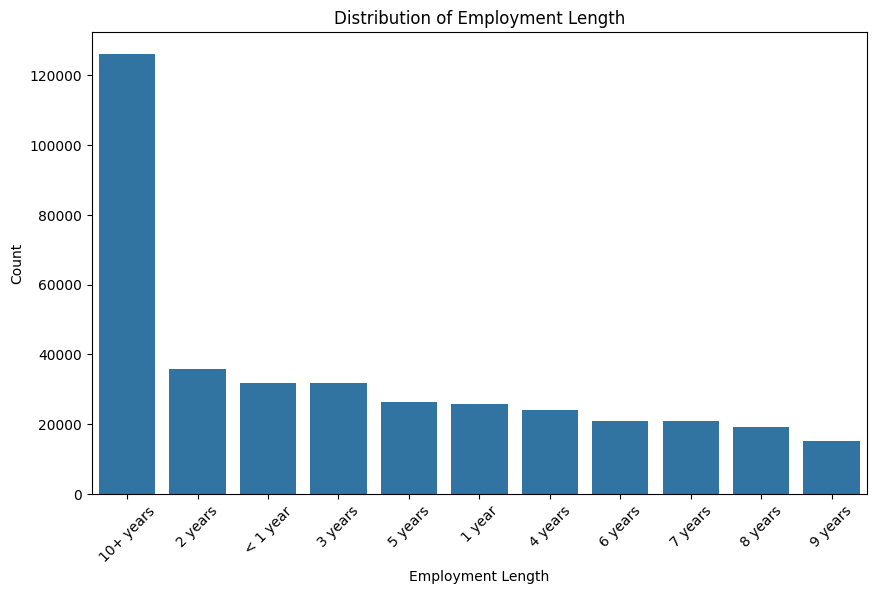

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot for emp_length
plt.figure(figsize=(10,6))
sns.countplot(x="emp_length", data=df, order=df['emp_length'].value_counts().index)

plt.title("Distribution of Employment Length")
plt.xlabel("Employment Length")
plt.ylabel("Count")
plt.xticks(rotation=45)   # rotate labels for better visibility
plt.show()

In [ ]:
import numpy as np

# 1. Clean the values: remove 'years', 'year', '+', '<'
def clean_emp_length(x):
    if pd.isnull(x):
        return np.nan
    if x == '< 1 year':
        return 0
    if x == '10+ years':
        return 10
    return int(x.strip().split()[0])   # e.g. '4 years' -> 4

df['emp_length'] = df['emp_length'].apply(clean_emp_length)

# 2. Check median
median_val = df['emp_length'].median()
print("Median Employment Length:", median_val)

# 3. Fill missing with median
df['emp_length'] = df['emp_length'].fillna(median_val)

# 4. Verify
df['emp_length'].value_counts(dropna=False)


Median Employment Length: 6.0


,count
emp_length,
10.0,126041
6.0,39142
2.0,35827
0.0,31725
3.0,31665
5.0,26495
1.0,25882
4.0,23952
7.0,20819


#### For `title`
- missing values 1,756

/tmp/ipython-input-170303204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")


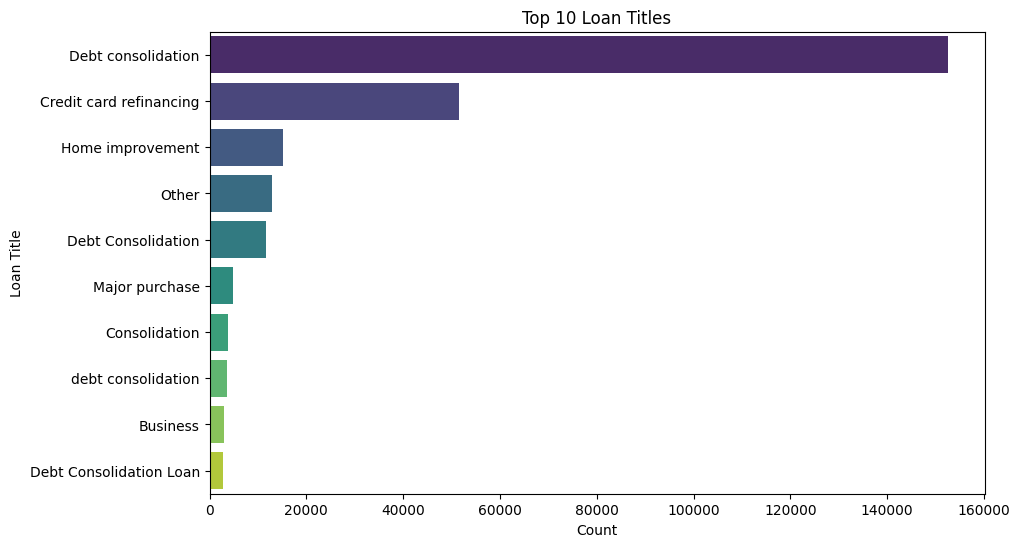

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance
...,...
396025,Debt consolidation
396026,Debt consolidation
396027,pay off credit cards
396028,Loanforpayoff


In [ ]:
# check top 10 most common titles
top_titles = df['title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")
plt.title("Top 10 Loan Titles")
plt.xlabel("Count")
plt.ylabel("Loan Title")
plt.show()

df['title']

In [ ]:
# Making The values lower case and removing the symbols,special characters from the values
df['title']=df['title'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.strip()
df['title']

,title
0,vacation
1,debt consolidation
2,credit card refinancing
3,credit card refinancing
4,credit card refinance
...,...
396025,debt consolidation
396026,debt consolidation
396027,pay off credit cards
396028,loanforpayoff


In [ ]:
# Filling the Title NAN Values with Unknown
df['title'] = df['title'].fillna("Unknown")

#### For  `revol_util`
- missing values: 276

In [ ]:
median_val = df['revol_util'].median()
df['revol_util'] = df['revol_util'].fillna(median_val)
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


#### for `mort_acc`
- missing values: 37795

/tmp/ipython-input-3142707218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortacc_counts.index, y=mortacc_counts.values, palette="viridis")


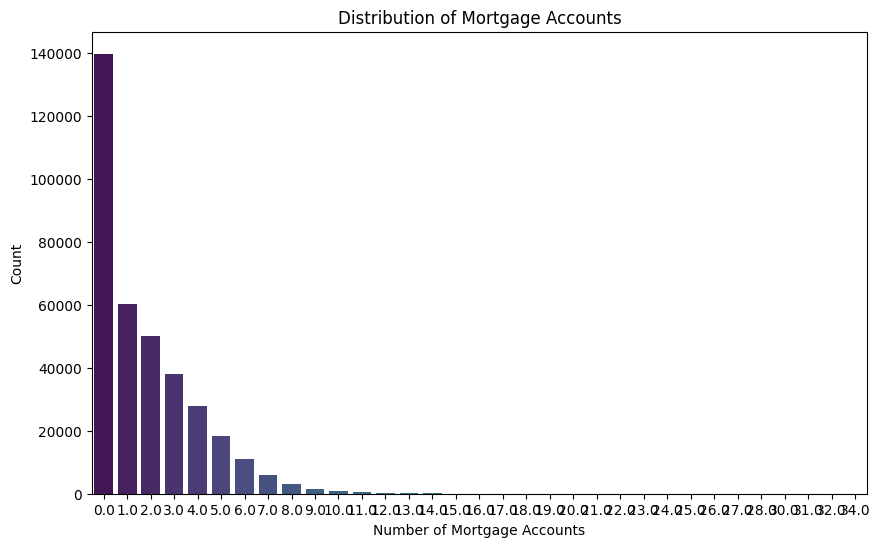

In [ ]:
mortacc_counts = df['mort_acc'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=mortacc_counts.index, y=mortacc_counts.values, palette="viridis")
plt.title("Distribution of Mortgage Accounts")
plt.xlabel("Number of Mortgage Accounts")
plt.ylabel("Count")
plt.show()


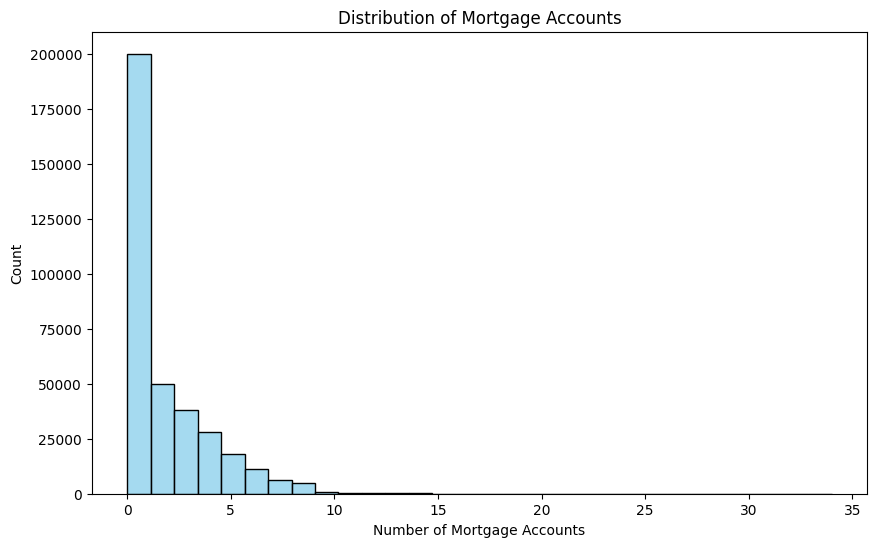

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['mort_acc'], bins=30, kde=False, color="skyblue")
plt.title("Distribution of Mortgage Accounts")
plt.xlabel("Number of Mortgage Accounts")
plt.ylabel("Count")
plt.show()

In [ ]:
# Since,"mort_acc" has many missing values we cannot use median,mean directly to treat the missing values
# Therefore, Checking the correlation of columns with mort_acc
corr_matrix = df.corr(numeric_only=True)

# sort by mort_acc correlation
corr_with_mort_acc = corr_matrix['mort_acc'].sort_values(ascending=False)
print(corr_with_mort_acc)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
emp_length              0.193251
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64


The Most Correlated Column With `mort_acc` is `total_acc`


In [ ]:
# Fill missing values in 'mort_acc' using median of corresponding 'total_acc' groups
df['mort_acc'] = df['mort_acc'].fillna(
    df.groupby('total_acc')['mort_acc'].transform('median')
)
print("missing Values in mort_acc = ",df['mort_acc'].isnull().sum())

missing Values in mort_acc =  0


#### Now Treat The Column `pub_rec_bankruptcies`
- missing values : 535

In [ ]:
# the missing values are not that much
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

#### Column `loan_amnt`

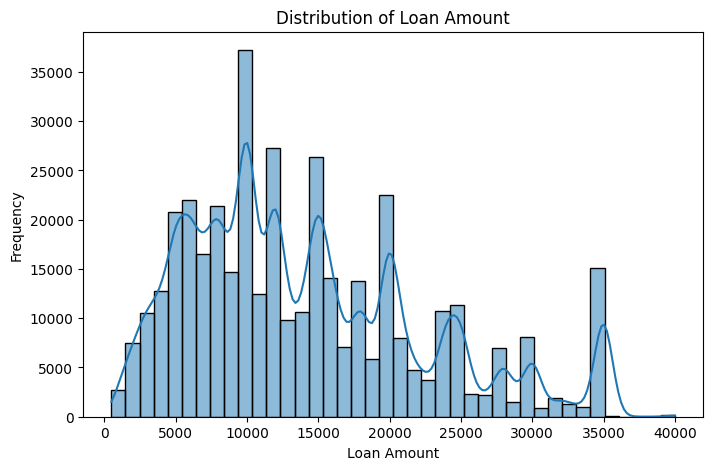

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=40, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

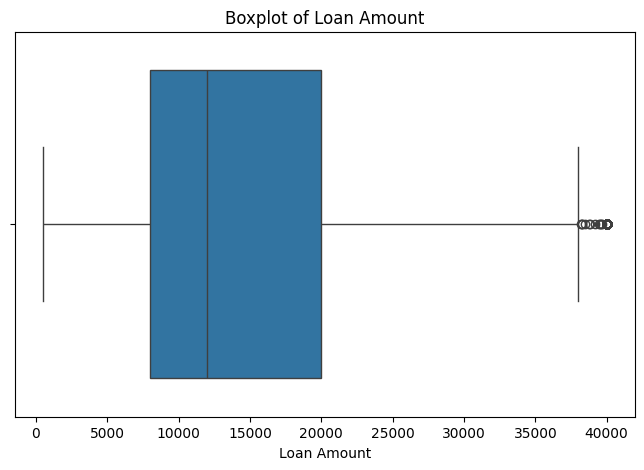

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['loan_amnt'])
plt.title("Boxplot of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

In [ ]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Check outliers count
outliers = df[(df['loan_amnt'] < lower_limit) | (df['loan_amnt'] > upper_limit)]
print("Outliers found:", outliers.shape[0])


Lower Limit: -10000.0
Upper Limit: 38000.0
Outliers found: 191


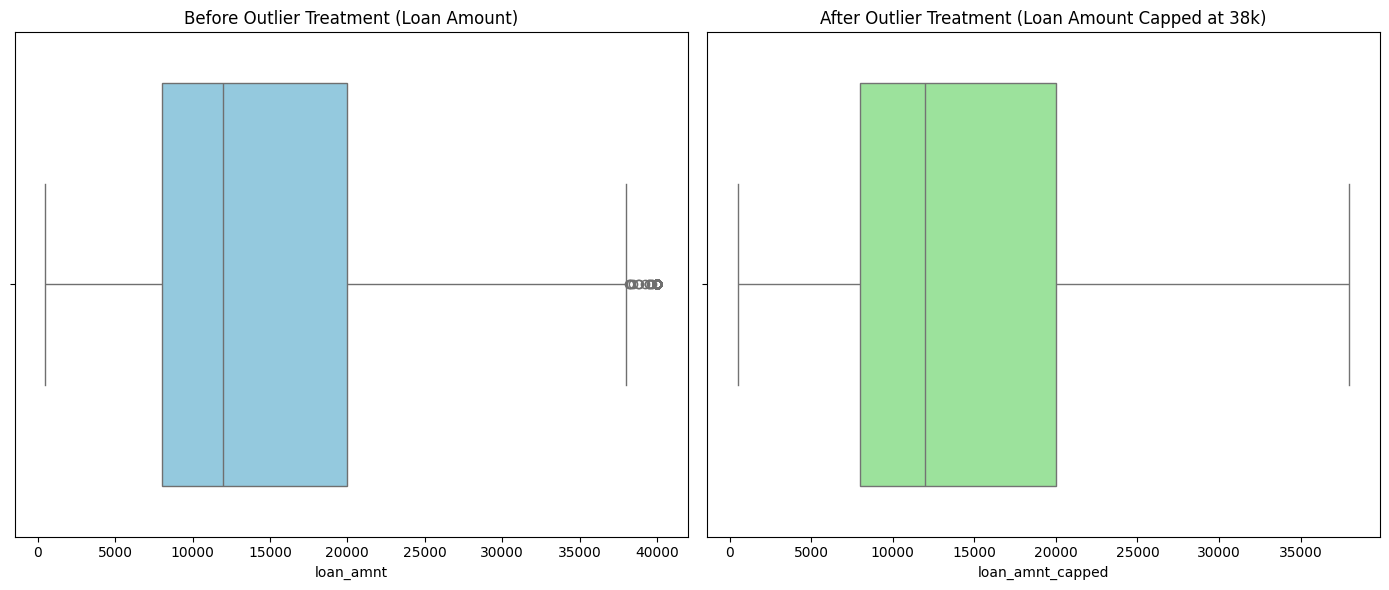

In [ ]:
plt.figure(figsize=(14,6))

# Before
plt.subplot(1,2,1)
sns.boxplot(x=df['loan_amnt'], color="skyblue")
plt.title("Before Outlier Treatment (Loan Amount)")
#copy of df
df_copy = df.copy()

# Cap loan_amnt above 38000
df_copy['loan_amnt_capped'] = np.where(df_copy['loan_amnt'] > 38000, 38000, df_copy['loan_amnt'])

# After
plt.subplot(1,2,2)
sns.boxplot(x=df_copy['loan_amnt_capped'], color="lightgreen")
plt.title("After Outlier Treatment (Loan Amount Capped at 38k)")

plt.tight_layout()
plt.show()


#### Column `term`

/tmp/ipython-input-1794965914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['term'], palette="viridis")


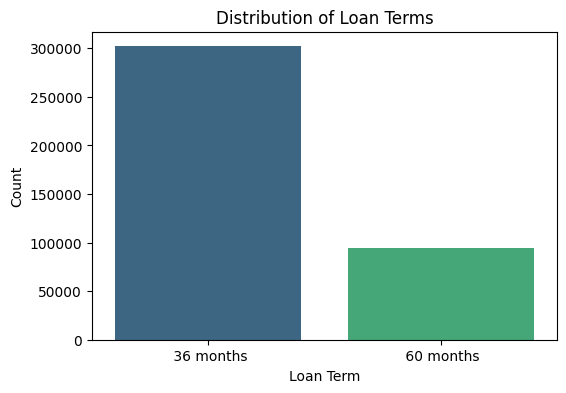

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['term'], palette="viridis")
plt.title("Distribution of Loan Terms")
plt.xlabel("Loan Term")
plt.ylabel("Count")
plt.show()

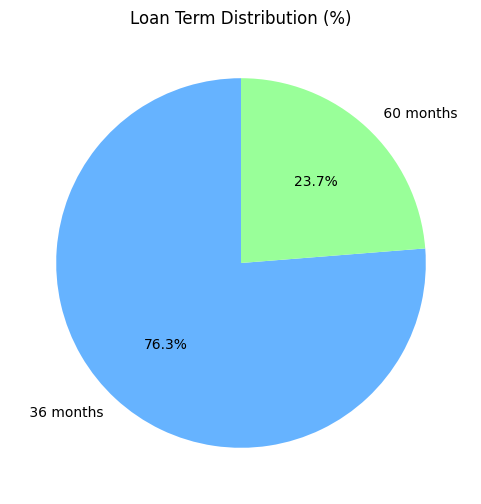

In [ ]:
term_counts = df['term'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff","#99ff99"])
plt.title("Loan Term Distribution (%)")
plt.show()

In [ ]:
df['term'] = df['term'].astype(str).str.extract(r'(\d+)').astype(float).astype('Int64')
print(df['term'].unique())


<IntegerArray>
[36, 60]
Length: 2, dtype: Int64


#### For `int_rate`

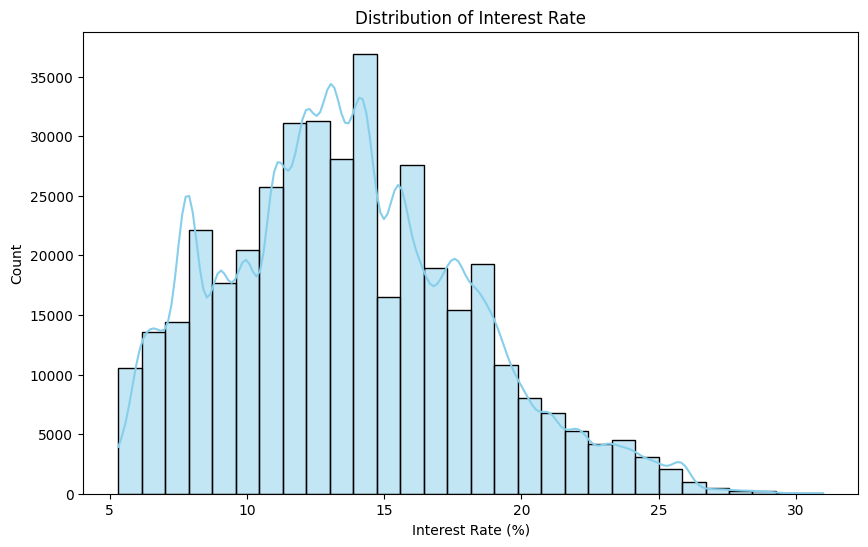

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['int_rate'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Count")
plt.show()

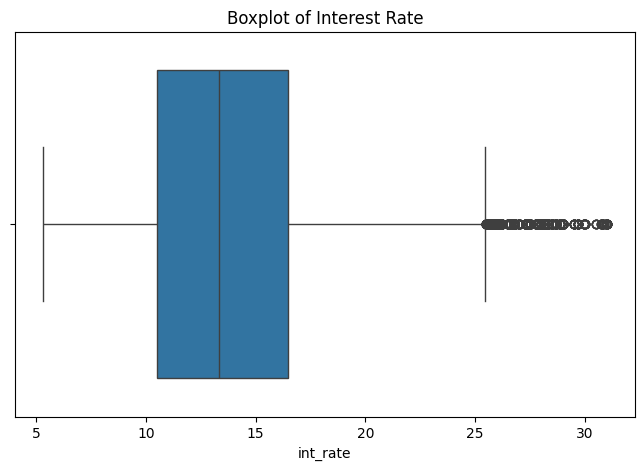

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['int_rate'])
plt.title("Boxplot of Interest Rate")
plt.show()


The Outliers are in the range of 0 - 40 which is realastic so we will keep the outliers

#### For `installment`

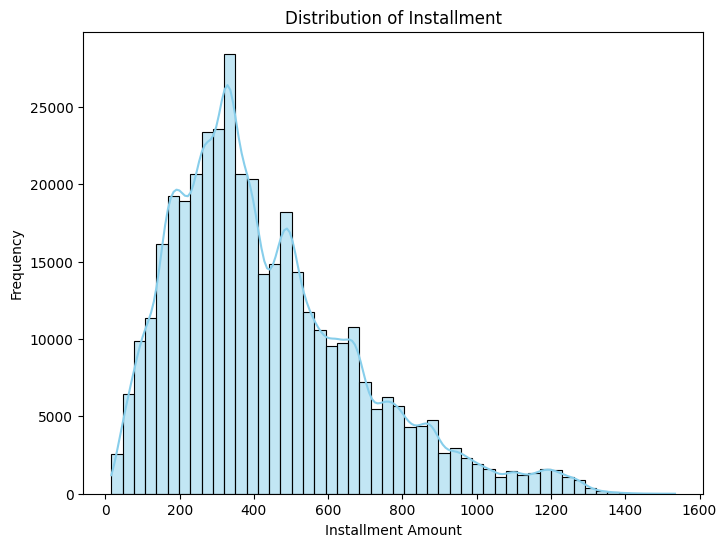

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['installment'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Installment")
plt.xlabel("Installment Amount")
plt.ylabel("Frequency")
plt.show()


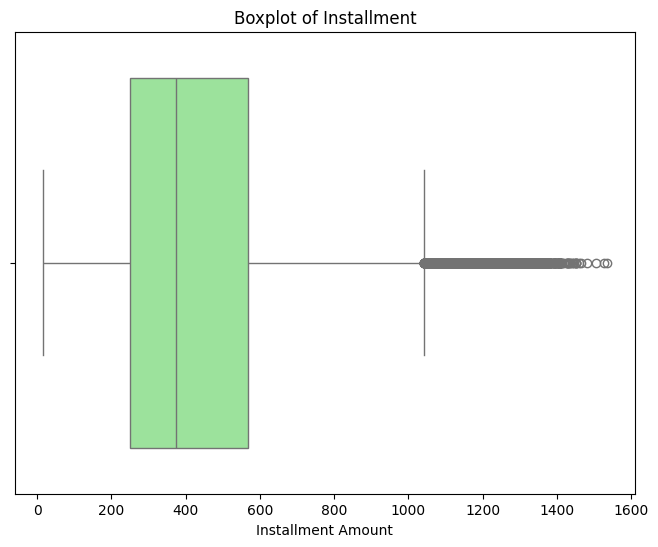

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['installment'], color="lightgreen")
plt.title("Boxplot of Installment")
plt.xlabel("Installment Amount")
plt.show()

In [ ]:
# Summary stats for installment
summary_stats = df['installment'].describe()[['min','max','mean']]
median_val = df['installment'].median()

print("Summary Statistics for Installment:")
print(f"Minimum: {summary_stats['min']}")
print(f"Maximum: {summary_stats['max']}")
print(f"Mean: {round(summary_stats['mean'],4)}")
print(f"Median: {median_val}")


Summary Statistics for Installment:
Minimum: 16.08
Maximum: 1533.81
Mean: 431.8497
Median: 375.43


#### For `grade`
- Loan grade (A–G)

/tmp/ipython-input-2734548261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grades, y=percentages, palette="viridis")


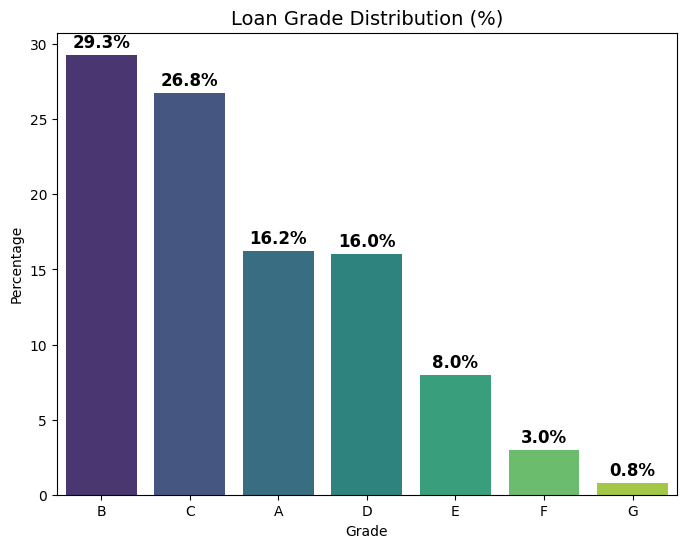

In [ ]:
# Count of each grade
grade_counts = df['grade'].value_counts(normalize=True) * 100   # % me convert
grades = grade_counts.index
percentages = grade_counts.values

plt.figure(figsize=(8,6))
sns.barplot(x=grades, y=percentages, palette="viridis")

# Har bar ke upar % text
for i, val in enumerate(percentages):
    plt.text(i, val+0.5, f"{val:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.title("Loan Grade Distribution (%)", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.show()


- B is the most common grade
- G is the lowest common grade

##### For `sub_grade`
-**bold text** Loan subgrade (e.g., A1, A2)


Percentage distribution for Grade A:

sub_grade
A1    15.157275
A2    14.904887
A3    16.476857
A4    24.598439
A5    28.862542
Name: count, dtype: float64


/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")


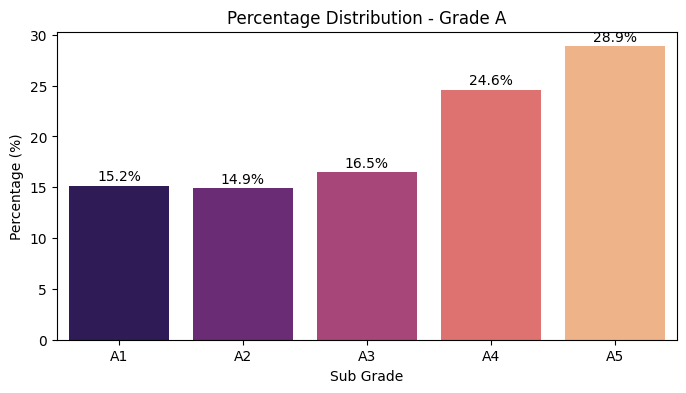


Percentage distribution for Grade B:

sub_grade
B1    16.533641
B2    19.389233
B3    22.974883
B4    22.066403
B5    19.035839
Name: count, dtype: float64


/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")


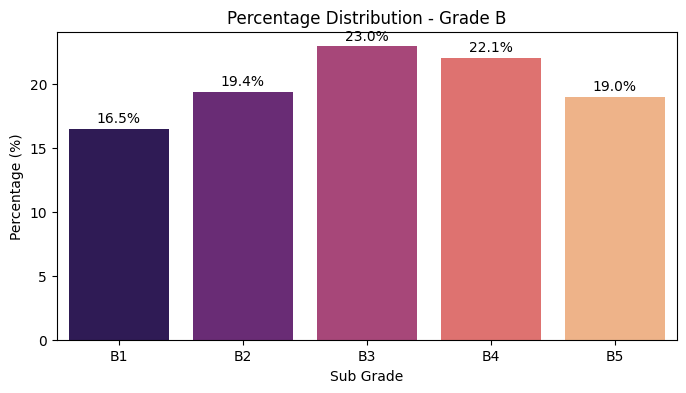


Percentage distribution for Grade C:

sub_grade
C1    22.325380
C2    21.304500
C3    20.022267
C4    19.134422
C5    17.213432
Name: count, dtype: float64


/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")


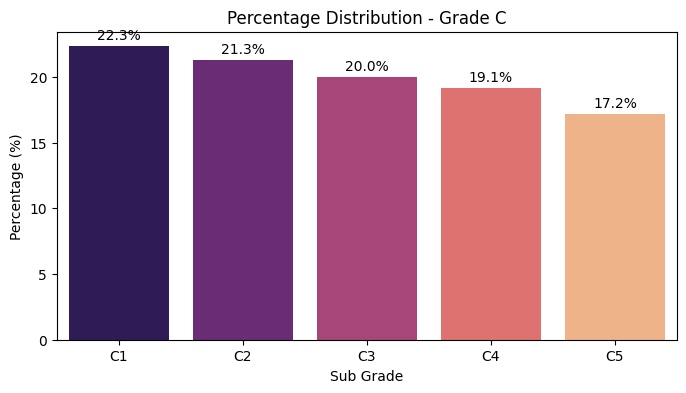


Percentage distribution for Grade D:

sub_grade
D1    25.176311
D2    21.961778
D3    19.241547
D4    18.350545
D5    15.269819
Name: count, dtype: float64


/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")


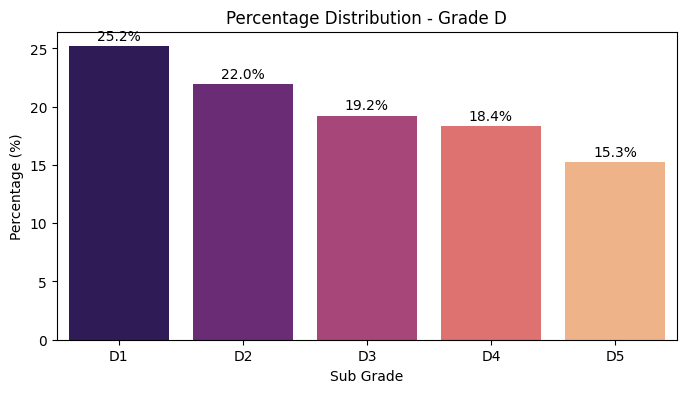


Percentage distribution for Grade E:

sub_grade
E1    25.142912
E2    23.599466
E3    19.712271
E4    17.025534
E5    14.519817
Name: count, dtype: float64


/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")


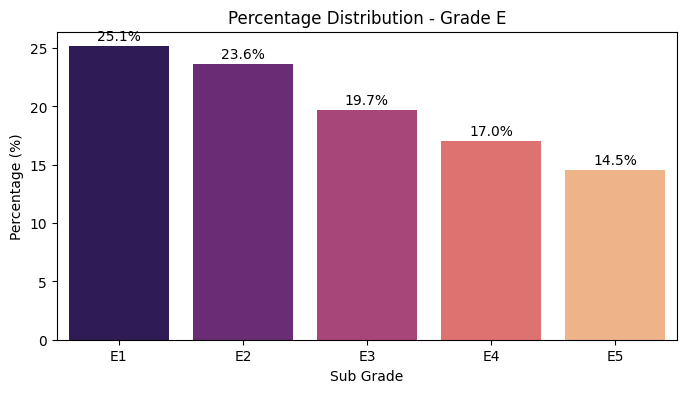

/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")



Percentage distribution for Grade F:

sub_grade
F1    30.037377
F2    23.496432
F3    19.418960
F4    15.180088
F5    11.867142
Name: count, dtype: float64


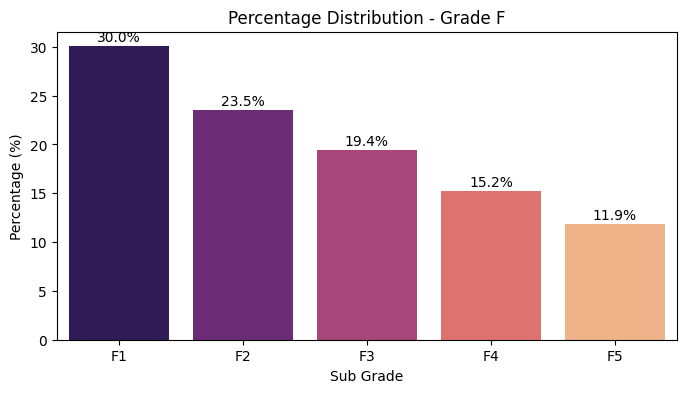


Percentage distribution for Grade G:

sub_grade
G1    34.643091
G2    24.688933
G3    18.074656
G4    12.246234
G5    10.347086
Name: count, dtype: float64


/tmp/ipython-input-3989536972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="magma")


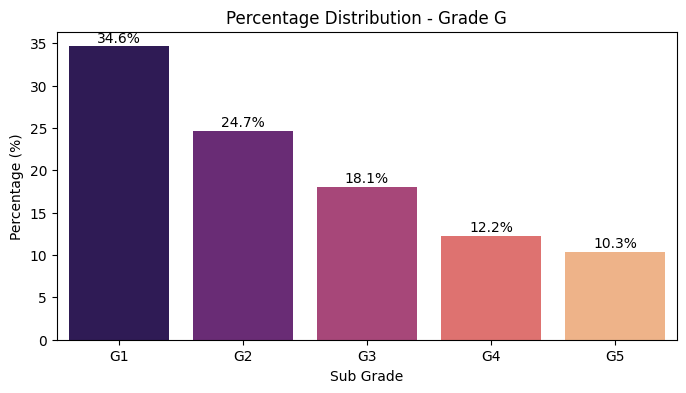

In [ ]:
# Create grade bin
df['grade_bin'] = df['sub_grade'].str[0]

# Loop through each grade bin and plot
for grade in sorted(df['grade_bin'].unique()):
    subgrade_subset = df[df['grade_bin'] == grade]['sub_grade']
    counts = subgrade_subset.value_counts().sort_index()
    percent = (counts / counts.sum()) * 100

    # Display table
    print(f"\nPercentage distribution for Grade {grade}:\n")
    print(percent)

    # Barplot
    plt.figure(figsize=(8,4))
    sns.barplot(x=percent.index, y=percent.values, palette="magma")
    plt.title(f"Percentage Distribution - Grade {grade}")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Sub Grade")
    for i, v in enumerate(percent.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
    plt.show()


In [ ]:
# Mode for grade
grade_mode = df['grade'].mode()[0]
print(f"Most frequent Grade: {grade_mode}")

# Mode for sub_grade
subgrade_mode = df['sub_grade'].mode()[0]
print(f"Most frequent Sub Grade: {subgrade_mode}")


Most frequent Grade: B
Most frequent Sub Grade: B3


#### For `home_ownership` :  Home ownership status

In [ ]:
# Lowercase, strip spaces, remove non-alphanumeric (except underscore)
df['home_ownership'] = df['home_ownership'].str.lower().str.strip().str.replace(r'[^a-z_]', '', regex=True)

In [ ]:
# Count per home_ownership category
home_counts = df['home_ownership'].value_counts()
print(home_counts)


home_ownership
mortgage    198348
rent        159790
own          37746
other          112
none            31
any              3
Name: count, dtype: int64


/tmp/ipython-input-1351526794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_percent.index, y=home_percent.values, palette="viridis")


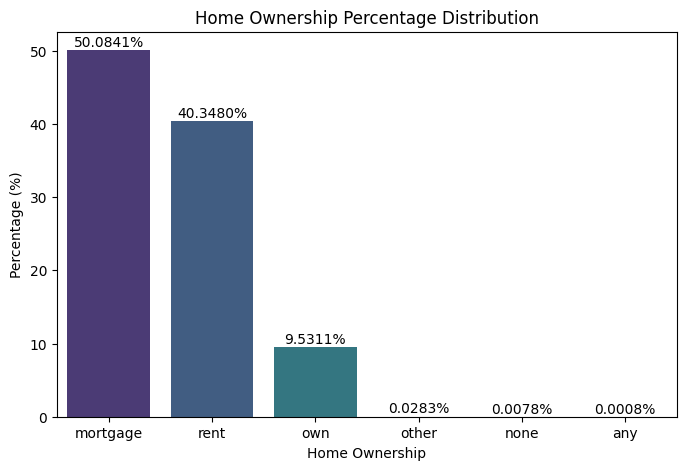

In [ ]:
home_counts = df['home_ownership'].value_counts()
home_percent = (home_counts / home_counts.sum()) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=home_percent.index, y=home_percent.values, palette="viridis")
plt.ylabel("Percentage (%)")
plt.xlabel("Home Ownership")
plt.title("Home Ownership Percentage Distribution")
for i, v in enumerate(home_percent.values):
    plt.text(i, v + 0.5, f"{v:.4f}%", ha='center')
plt.show()

**Summary Stats** :    
- People with Mortgage : `50.0841 `%
- People with Rent : `40.3480`%

In [ ]:
# Combine rare categories in home_ownership
df['home_ownership'] = df['home_ownership'].replace(
    ['none', 'any', 'other'], 'other'
)

# Check the updated distribution
print(df['home_ownership'].value_counts(normalize=True) * 100)


home_ownership
mortgage    50.084085
rent        40.347953
own          9.531096
other        0.036866
Name: proportion, dtype: float64


#### For `annual_inc`
-	Annual income (self-reported)

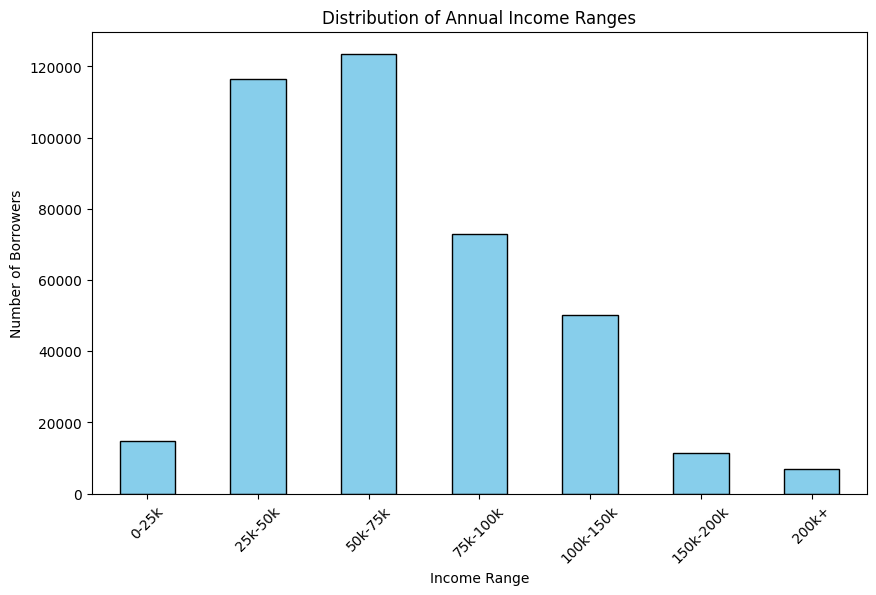

In [ ]:
# Define income bins
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, df['annual_inc'].max()]
labels = ['0-25k','25k-50k','50k-75k','75k-100k','100k-150k','150k-200k','200k+']

df['income_bin'] = pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True)

# Countplot
plt.figure(figsize=(10,6))
df['income_bin'].value_counts().sort_index().plot(kind='bar', color="skyblue", edgecolor="black")

plt.title("Distribution of Annual Income Ranges")
plt.xlabel("Income Range")
plt.ylabel("Number of Borrowers")
plt.xticks(rotation=45)
plt.show()

##### Checking Outliers and Treating outlier

In [ ]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = df[(df['annual_inc'] < lower_bound) | (df['annual_inc'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Lower Bound: -22500.0, Upper Bound: 157500.0
Number of outliers: 16700


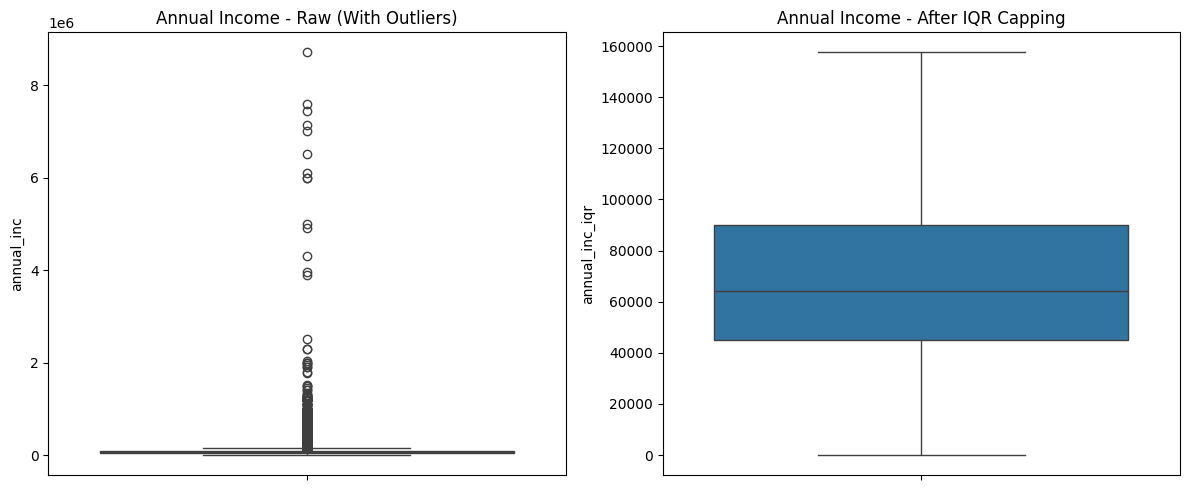

In [ ]:
# Cap using IQR
df['annual_inc_iqr'] = np.where(df['annual_inc'] > upper_bound, upper_bound,
                                np.where(df['annual_inc'] < lower_bound, lower_bound, df['annual_inc']))

# Boxplots before vs after
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['annual_inc'])
plt.title("Annual Income - Raw (With Outliers)")

plt.subplot(1,2,2)
sns.boxplot(y=df['annual_inc_iqr'])
plt.title("Annual Income - After IQR Capping")

plt.tight_layout()
plt.show()


#### For `verification_status`
- Income verification status

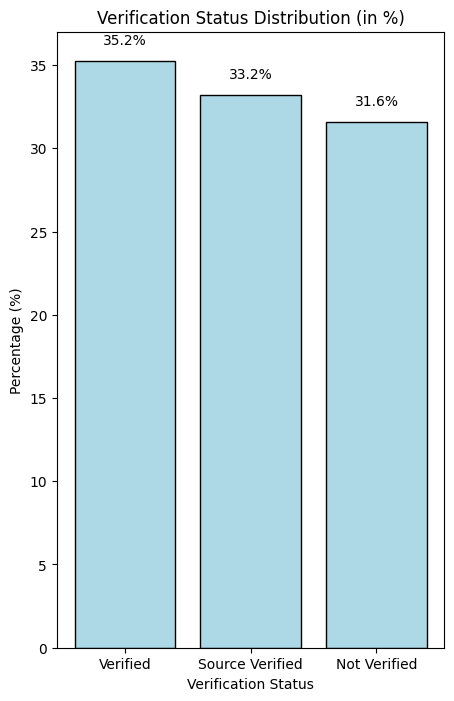

In [ ]:
# Percentage counts
data = df['verification_status'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(5,8))
plt.bar(data.index, data.values, color='lightblue', edgecolor='black')

# Labels and title
plt.xlabel("Verification Status")
plt.ylabel("Percentage (%)")
plt.title("Verification Status Distribution (in %)")

# Show values on top of bars
for i, v in enumerate(data.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()


#### For `issue_d`
- Loan issued date

/tmp/ipython-input-8902036.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


Text(0.5, 1.0, 'Loan For The Year')

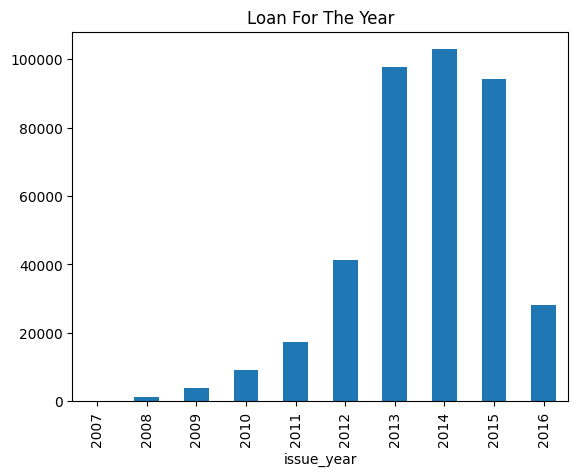

In [ ]:
# convert issue_date into date time format
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_year'] = df['issue_d'].dt.year
df['issue_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Loan For The Year')

Text(0.5, 1.0, 'Month wise Loan')

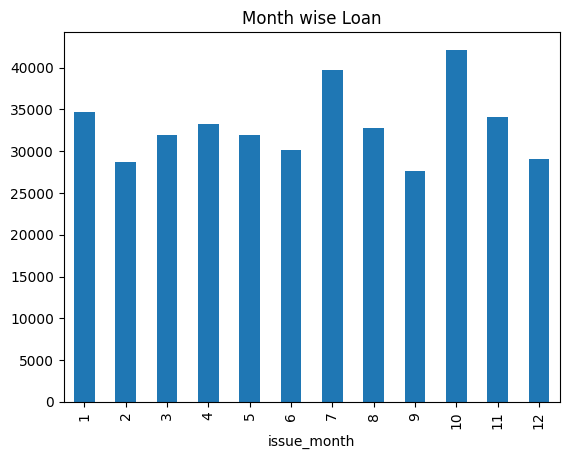

In [ ]:
df['issue_month'] = df['issue_d'].dt.month
df['issue_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Month wise Loan')

Text(0.5, 1.0, 'Time Series Line Graph')

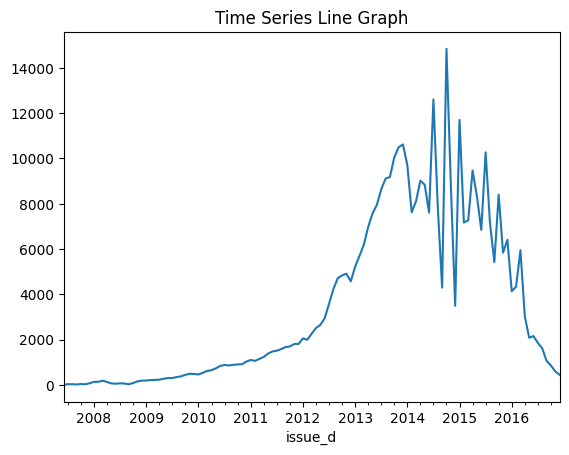

In [ ]:
#time series  line Graph
df.groupby(df['issue_d'].dt.to_period('M')).size().plot(kind='line')
plt.title('Time Series Line Graph')

Text(0.5, 1.0, 'Season Wise Loan')

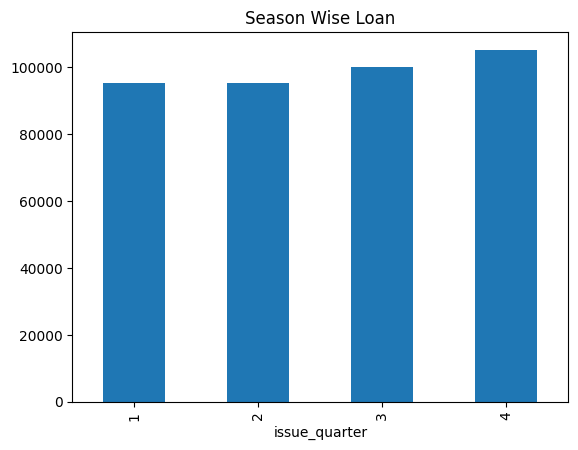

In [ ]:
# Seasonality check (Quarterly)
df['issue_quarter'] = df['issue_d'].dt.quarter
df['issue_quarter'].value_counts().sort_index().plot(kind='bar')
plt.title('Season Wise Loan')

#### For `loan_status`  
-	Target variable (Fully Paid / Charged Off)

<Axes: xlabel='count', ylabel='loan_status'>

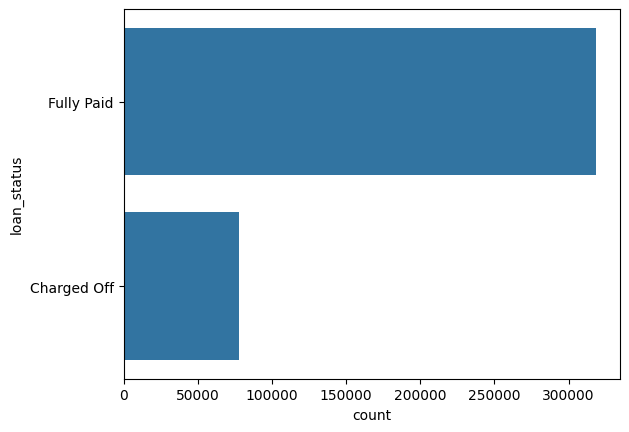

In [ ]:
sns.countplot(y=df['loan_status'],)

`Note` : The Number of Fully Paid **Is Greater Than** Charged oFF people



#### For `purpose`
- Loan Purpose

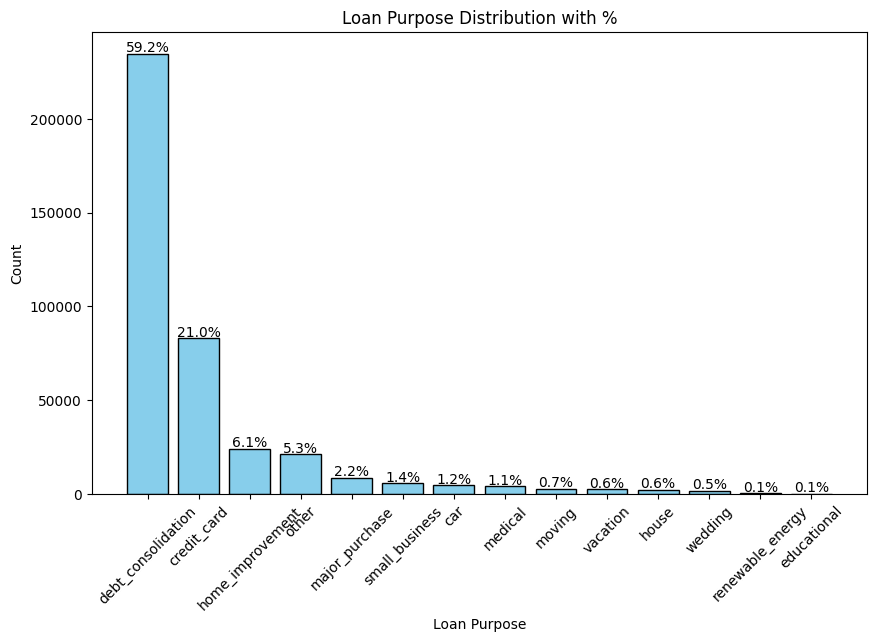

In [ ]:
purpose_counts = df['purpose'].value_counts().reset_index()
purpose_counts.columns = ['purpose', 'count']
purpose_counts['percentage'] = (purpose_counts['count'] / purpose_counts['count'].sum()) * 100

purpose_counts['cumulative_percent'] = purpose_counts['percentage'].cumsum()

plt.figure(figsize=(10,6))
plt.bar(purpose_counts['purpose'], purpose_counts['count'], color='skyblue', edgecolor='black')

for i, v in enumerate(purpose_counts['count']):
    plt.text(i, v+1000, f"{purpose_counts['percentage'].iloc[i]:.1f}%", ha='center')

plt.xticks(rotation=45)
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.title("Loan Purpose Distribution with %")
plt.show()


In [ ]:
df['purpose'] = df['purpose'].str.lower().str.strip().str.replace(r'[^a-z\s]', '', regex=True)
df['purpose'].value_counts()

,count
purpose,
debtconsolidation,234507
creditcard,83019
homeimprovement,24030
other,21185
majorpurchase,8790
smallbusiness,5701
car,4697
medical,4196
moving,2854


##### Loan Purpose Category Merging

### 🔹 Original Categories → Grouped Categories

- **Debt Related**
  - `debtconsolidation` → **debt**
  - `creditcard` → **debt**

- **Housing / Asset Related**
  - `homeimprovement` → **housing**
  - `house` → **housing**
  - `car` → **housing**

- **Business Related**
  - `smallbusiness` → **business**

- **Purchase Related**
  - `majorpurchase` → **purchase**

- **Personal Expenses**
  - `medical` → **personal**
  - `vacation` → **personal**
  - `wedding` → **personal**
  - `moving` → **personal**
  - `other` → **personal**

- **Education**
  - `educational` → **education**

- **Others**
  - `renewableenergy` → **others**


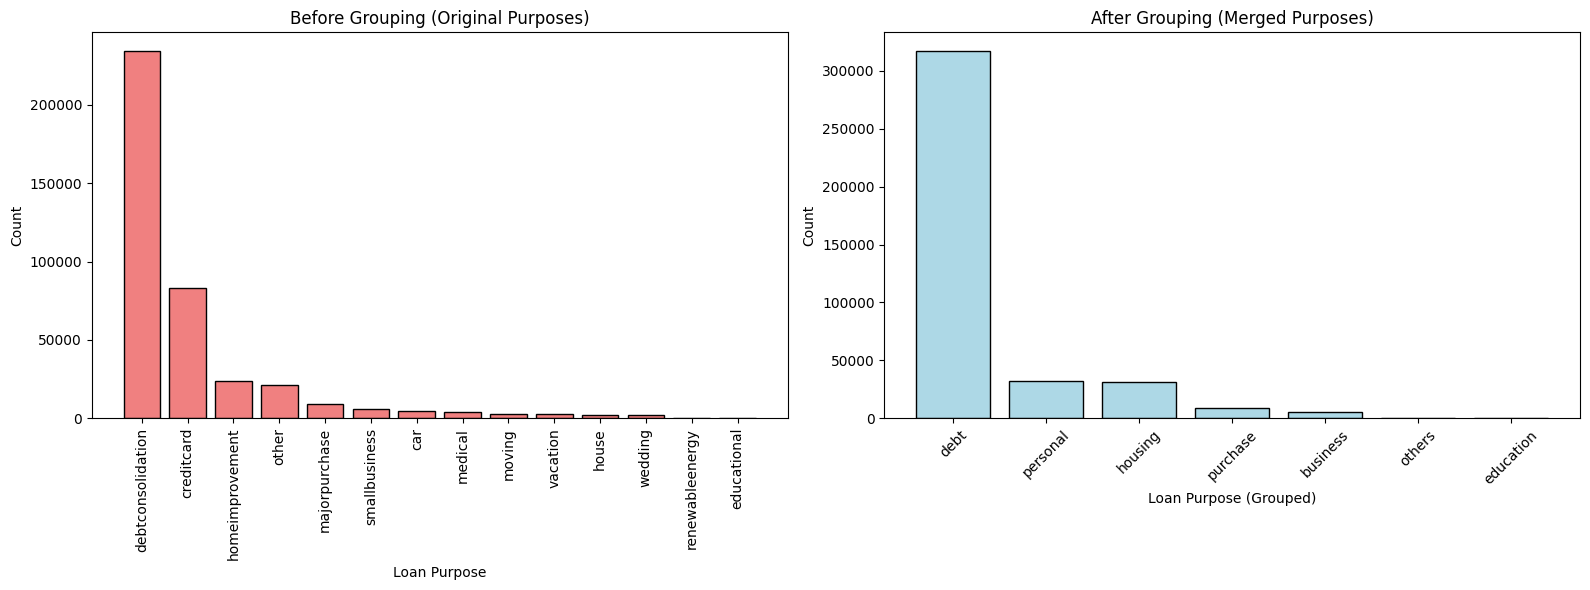

In [ ]:
# Mapping for merging categories
mapping = {
    'debtconsolidation': 'debt',
    'creditcard': 'debt',
    'homeimprovement': 'housing',
    'house': 'housing',
    'car': 'housing',
    'smallbusiness': 'business',
    'majorpurchase': 'purchase',
    'medical': 'personal',
    'vacation': 'personal',
    'wedding': 'personal',
    'moving': 'personal',
    'other': 'personal',
    'educational': 'education',
    'renewableenergy': 'others'
}

# Apply mapping
df['purpose_grouped'] = df['purpose'].map(mapping)

# Original counts
orig_counts = df['purpose'].value_counts().reset_index()
orig_counts.columns = ['purpose', 'count']

# Grouped counts
grouped_counts = df['purpose_grouped'].value_counts().reset_index()
grouped_counts.columns = ['purpose_grouped', 'count']

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Before (original)
axes[0].bar(orig_counts['purpose'], orig_counts['count'], color='lightcoral', edgecolor='black')
axes[0].set_title("Before Grouping (Original Purposes)")
axes[0].set_xlabel("Loan Purpose")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

# After (grouped)
axes[1].bar(grouped_counts['purpose_grouped'], grouped_counts['count'], color='lightblue', edgecolor='black')
axes[1].set_title("After Grouping (Merged Purposes)")
axes[1].set_xlabel("Loan Purpose (Grouped)")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Define mapping
mapping = {
    'debtconsolidation': 'debt',
    'creditcard': 'debt',
    'homeimprovement': 'housing',
    'house': 'housing',
    'car': 'housing',
    'smallbusiness': 'business',
    'majorpurchase': 'purchase',
    'medical': 'personal',
    'vacation': 'personal',
    'wedding': 'personal',
    'moving': 'personal',
    'other': 'personal',
    'educational': 'education',
    'renewableenergy': 'others'
}

# Apply mapping
df['purpose_grouped'] = df['purpose'].map(mapping)
df['purpose_grouped']

,purpose_grouped
0,personal
1,debt
2,debt
3,debt
4,debt
...,...
396025,debt
396026,debt
396027,debt
396028,debt


In [ ]:
df['purpose_grouped'].value_counts()

,count
purpose_grouped,
debt,317526
personal,32499
housing,30928
purchase,8790
business,5701
others,329
education,257


#### For `dti`
- Debt-to-Income ratio
- Lower DTI (<35%) → Safe borrower
- Higher DTI (>40–45%) → Risky borrower


- **Note** : Ye batata hai ki borrower apne income ka kitna % part loan aur debt chukane me kharch kar raha hai.

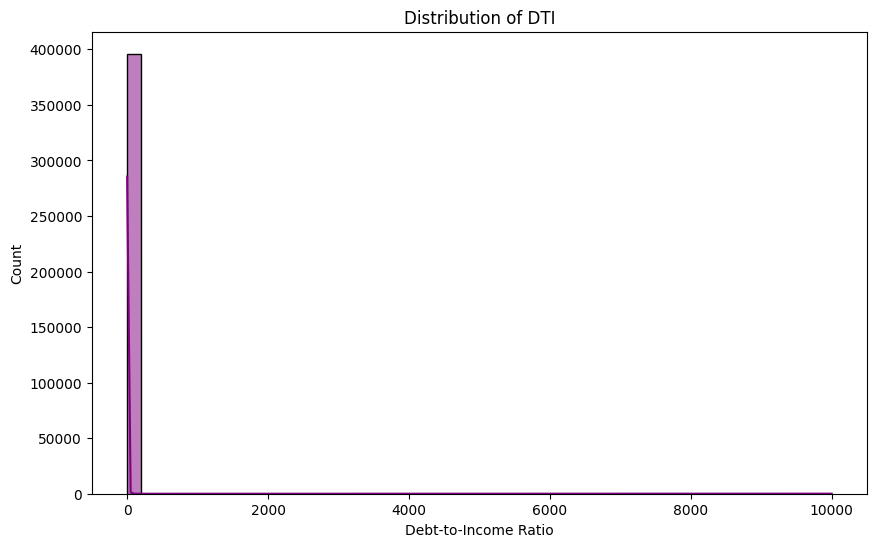

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['dti'], bins=50, kde=True, color="purple")
plt.title("Distribution of DTI")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Count")
plt.show()

📌 Column: dti
Q1: 11.28, Q3: 22.98, IQR: 11.7
Lower Limit: -6.27, Upper Limit: 40.53
Outliers Found: 275


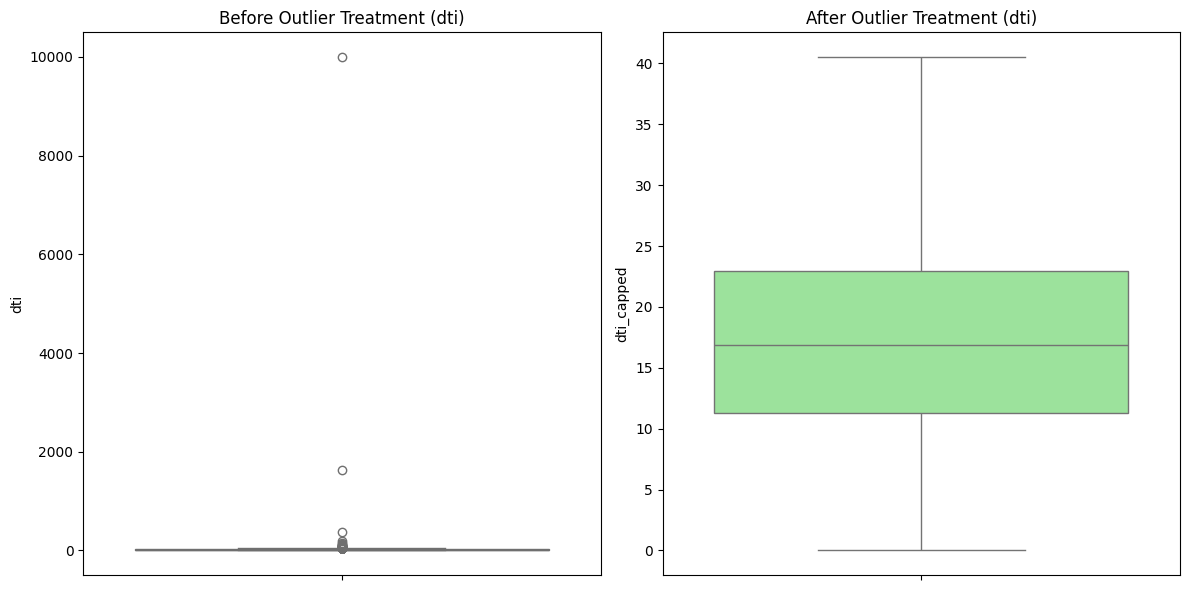

In [ ]:


def detect_and_cap_outliers(df, column, plot=True):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    print(f"📌 Column: {column}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {round(IQR,4)}")
    print(f"Lower Limit: {round(lower_limit,4)}, Upper Limit: {round(upper_limit,4)}")
    print(f"Outliers Found: {outliers.shape[0]}")

    # Cap values
    df[column + '_capped'] = df[column].clip(lower=lower_limit, upper=upper_limit)

    if plot:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        sns.boxplot(y=df[column], color="skyblue")
        plt.title(f"Before Outlier Treatment ({column})")

        plt.subplot(1,2,2)
        sns.boxplot(y=df[column + '_capped'], color="lightgreen")
        plt.title(f"After Outlier Treatment ({column})")

        plt.tight_layout()
        plt.show()

    return df, lower_limit, upper_limit, outliers

# Run for dti
df, lower_limit, upper_limit, outliers = detect_and_cap_outliers(df, 'dti')


#### For `earliest_cr_line`
- 	Date of earliest credit line

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['credit_year'] = df['earliest_cr_line'].dt.year
df['credit_history_length'] = (pd.to_datetime('today') - df['earliest_cr_line']).dt.days // 365

/tmp/ipython-input-2148405641.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')


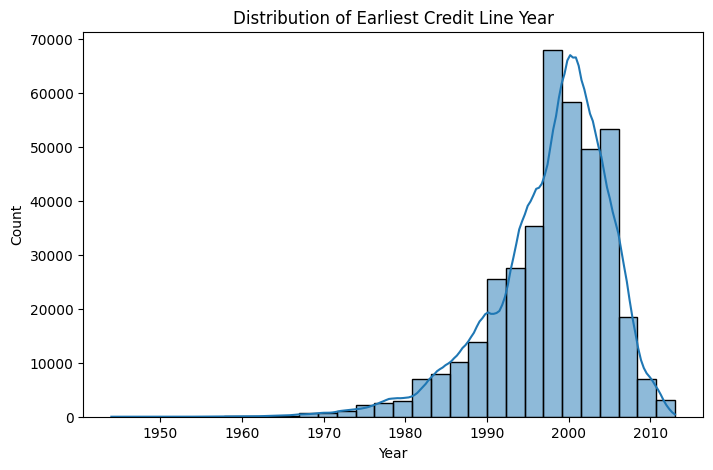

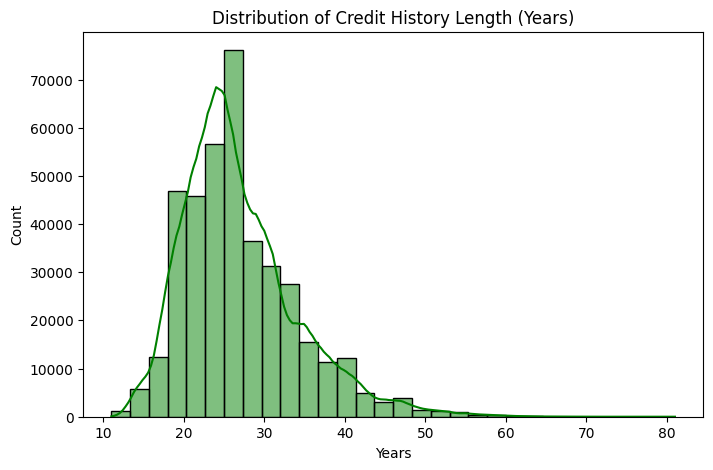

In [ ]:
# Histogram of year
plt.figure(figsize=(8,5))
sns.histplot(df['credit_year'], bins=30, kde=True)
plt.title("Distribution of Earliest Credit Line Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Histogram of credit history length
plt.figure(figsize=(8,5))
sns.histplot(df['credit_history_length'], bins=30, kde=True, color="green")
plt.title("Distribution of Credit History Length (Years)")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()


📌 Column: credit_history_length
Q1: 22.0, Q3: 30.0, IQR: 8.0
Lower Limit: 10.0, Upper Limit: 42.0


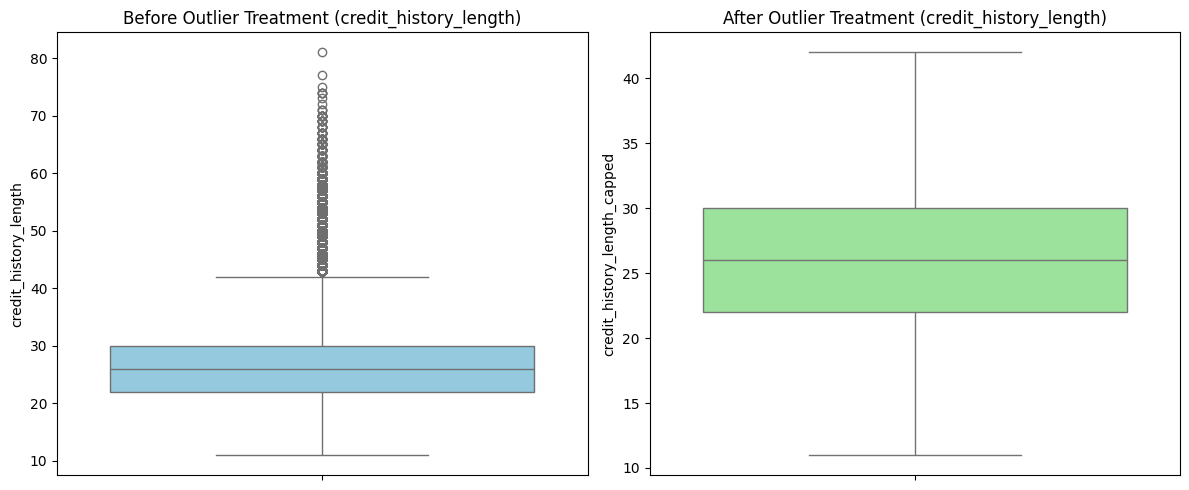

In [ ]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"📌 Column: {column}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {round(IQR,4)}")
    print(f"Lower Limit: {round(lower_limit,4)}, Upper Limit: {round(upper_limit,4)}")

    # capped column
    df[column + "_capped"] = df[column].clip(lower=lower_limit, upper=upper_limit)

    # before vs after plot
    fig, axes = plt.subplots(1,2, figsize=(12,5))

    sns.boxplot(y=df[column], ax=axes[0], color="skyblue")
    axes[0].set_title(f"Before Outlier Treatment ({column})")

    sns.boxplot(y=df[column + "_capped"], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"After Outlier Treatment ({column})")

    plt.tight_layout()
    plt.show()

    return df

# Example run
df = cap_outliers_iqr(df, 'credit_history_length')


#### For `open_acc`
- 	Number of open credit lines

📌 Column: open_acc
Q1: 8.0, Q3: 14.0, IQR: 6.0
Lower Limit: -1.0, Upper Limit: 23.0
Outliers Found: 10307


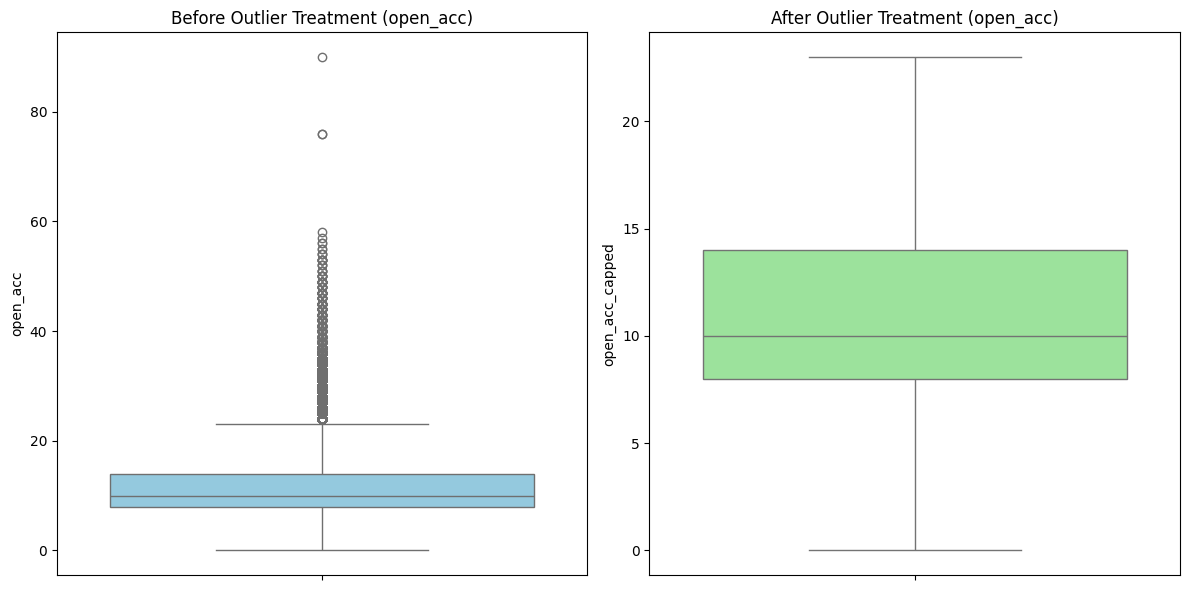

In [ ]:
df=detect_and_cap_outliers(df,'open_acc')

In [ ]:
df=df[0]
df=pd.DataFrame(df)

#### For `Address`
- address is not that nessary


In [ ]:
df = df.drop(columns=['address'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   loan_amnt                     396030 non-null  float64       
 1   term                          396030 non-null  Int64         
 2   int_rate                      396030 non-null  float64       
 3   installment                   396030 non-null  float64       
 4   grade                         396030 non-null  object        
 5   sub_grade                     396030 non-null  object        
 6   emp_length                    396030 non-null  float64       
 7   home_ownership                396030 non-null  object        
 8   annual_inc                    396030 non-null  float64       
 9   verification_status           396030 non-null  object        
 10  issue_d                       396030 non-null  datetime64[ns]
 11  loan_status  

# Bivariate Analysis

#### `emp_length` is converted into `emp_experience_level`  
- `emp_experience_level` vs `loan_status`


In [ ]:
def categorize_experience(x):
    if x in [0.0, 1.0]:
        return "Entry-level"
    elif x in [2.0, 3.0, 4.0]:
        return "Junior"
    elif x in [5.0, 6.0, 7.0, 8.0, 9.0]:
        return "Mid-level"
    elif x == 10.0:
        return "Experienced"
    else:
        return "Unknown"

df['emp_experience_level'] = df['emp_length'].apply(categorize_experience)


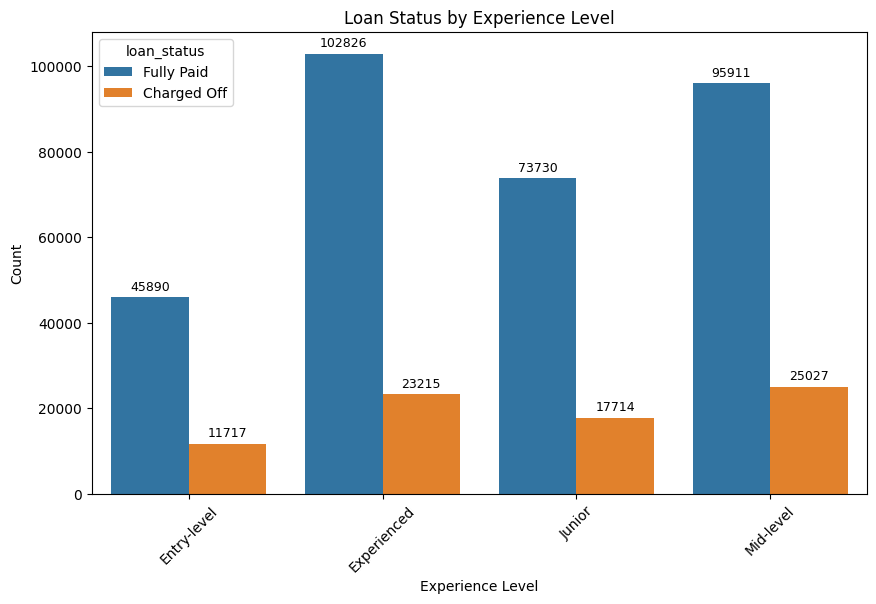

In [ ]:
# Group + reset
data = df.groupby('emp_experience_level')['loan_status'].value_counts().reset_index(name='count')

# Barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='emp_experience_level', y='count', hue='loan_status', data=data)

# Add labels on top of bars
from matplotlib import ticker
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

plt.title("Loan Status by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### `loan_amnt` vs `annual_income`

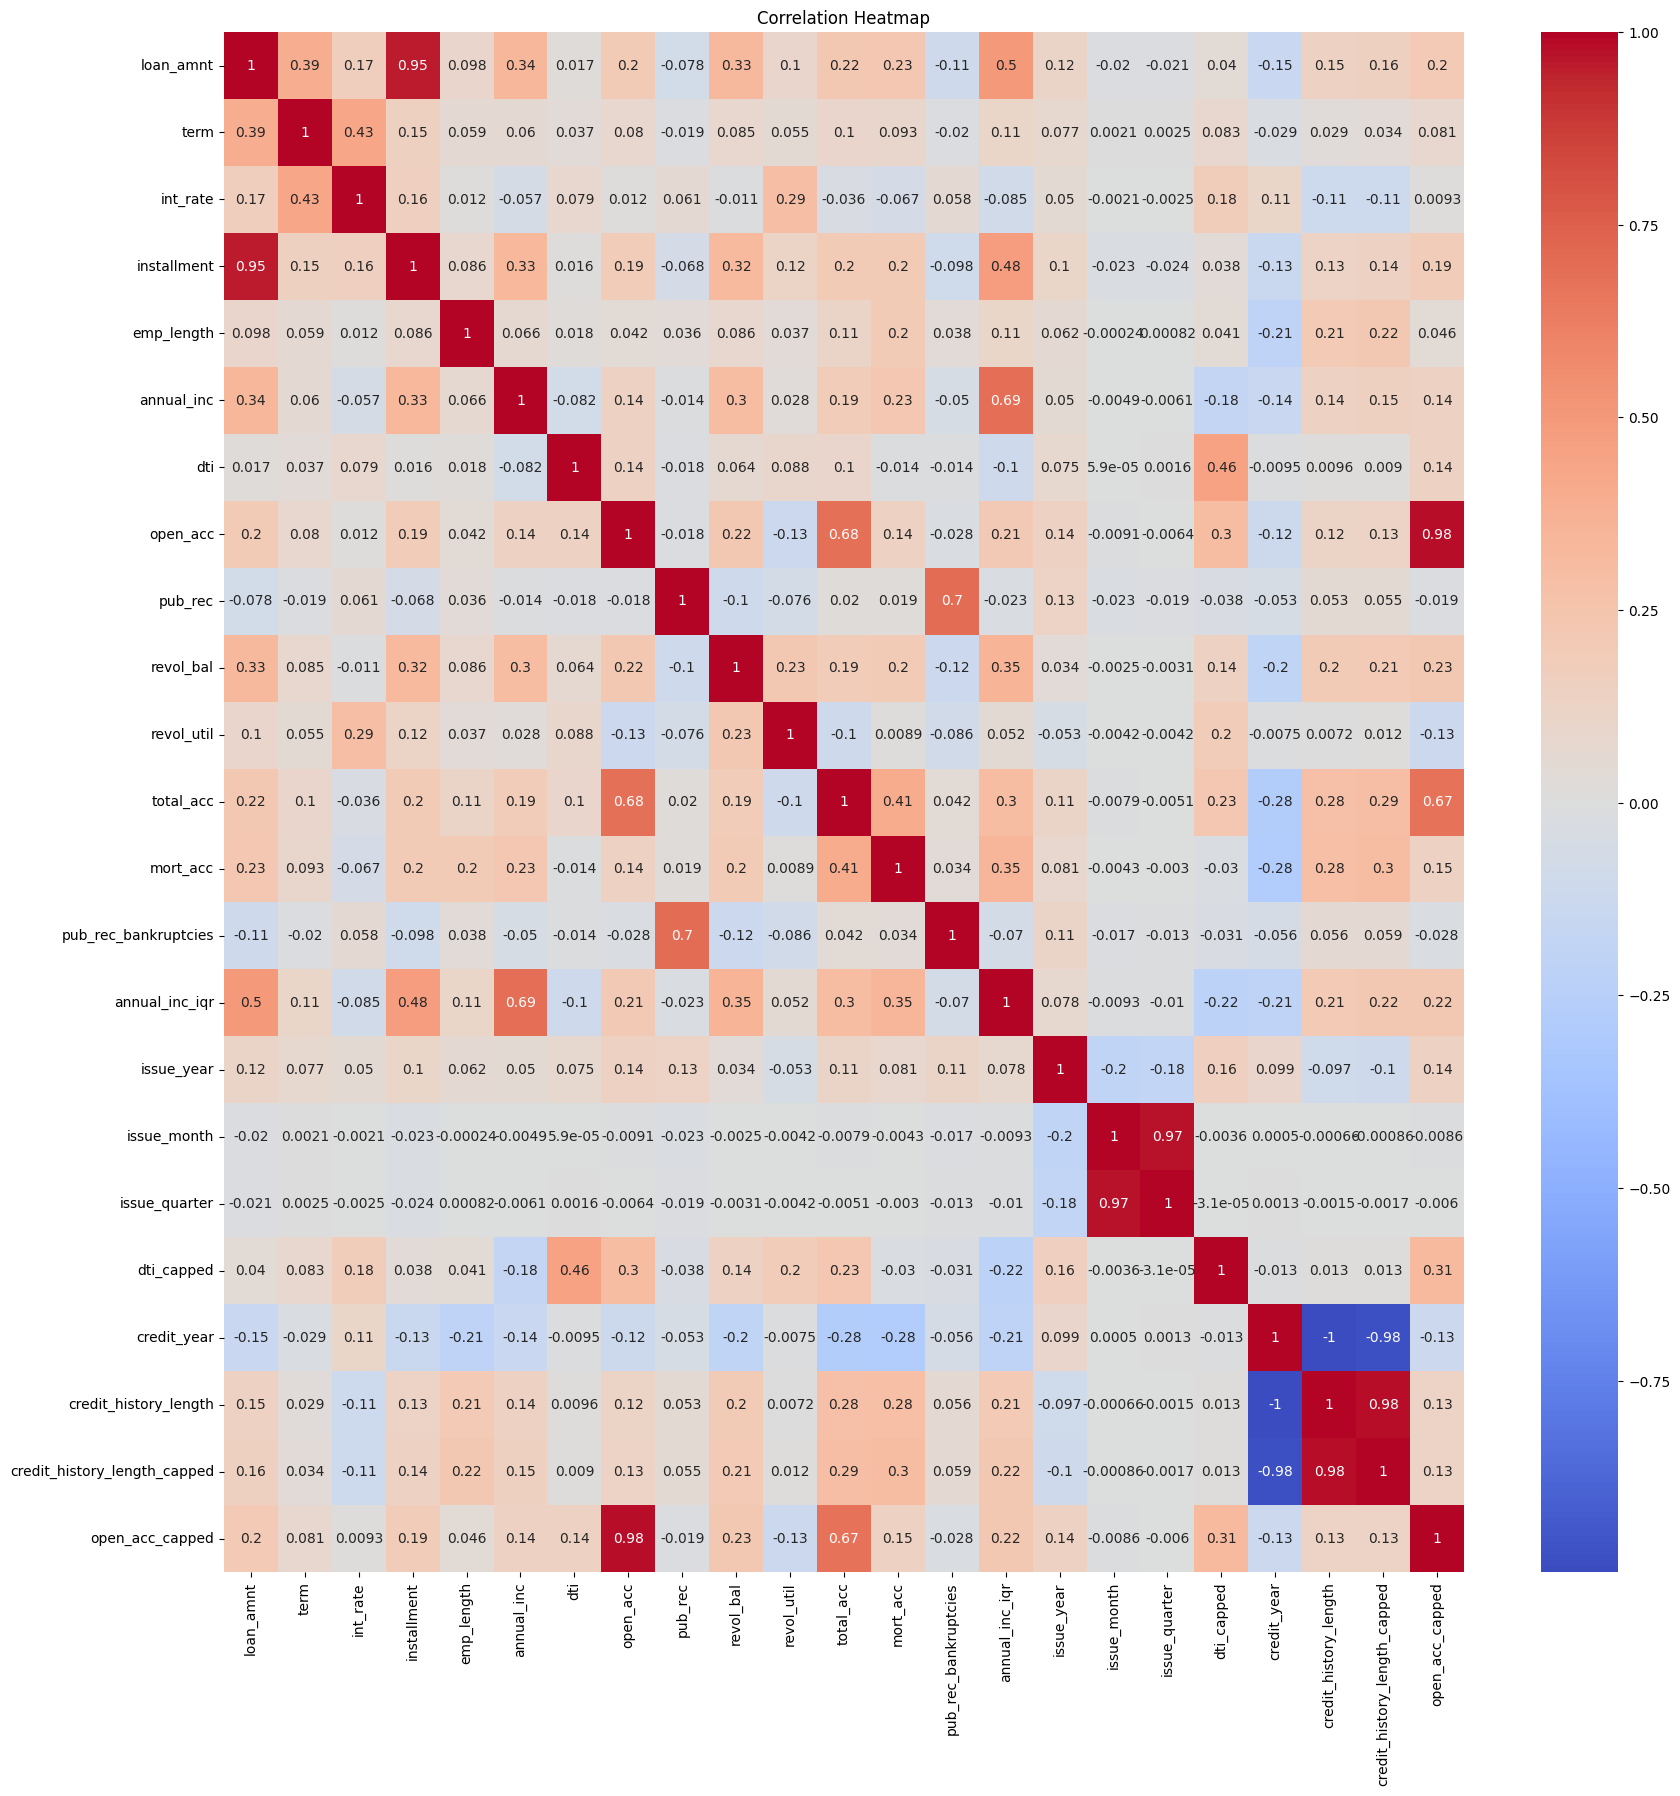

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


For `int_rate` vs `loan_status`

/tmp/ipython-input-3064998355.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('int_rate_bin')['loan_status']


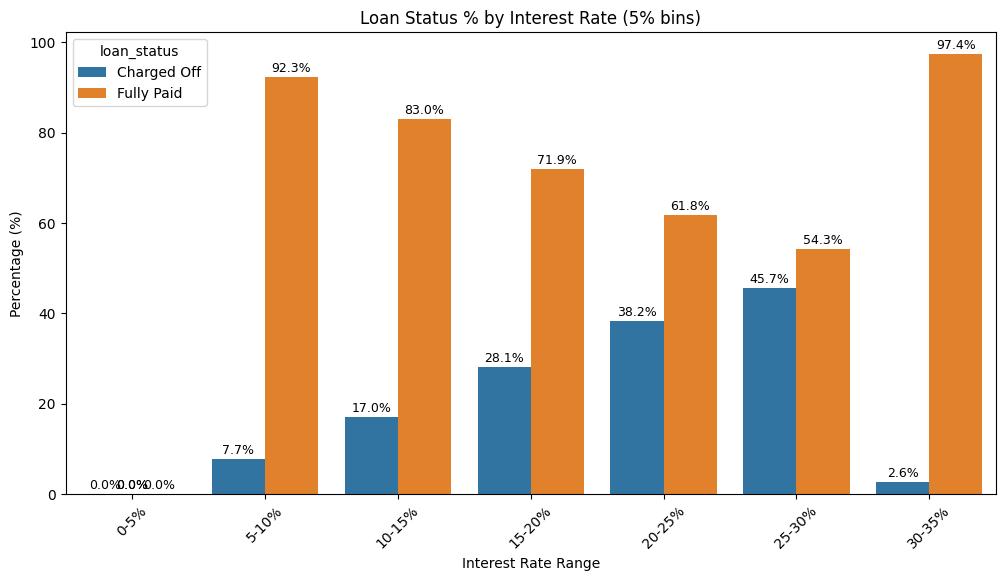

In [ ]:
# Step 1: Make 5% bins
max_rate = df['int_rate'].max()
bins = np.arange(0, max_rate+5, 5)  # 0, 5, 10, 15, ...
labels = [f"{int(b)}-{int(b+5)}%" for b in bins[:-1]]
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=bins, labels=labels, right=False)

# Step 2: Group + percentage
data = (
    df.groupby('int_rate_bin')['loan_status']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name='percentage')
)

# Step 3: Barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(x='int_rate_bin', y='percentage', hue='loan_status', data=data)

# Add % labels on top
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2.,
        p.get_height() + 0.5,
        f"{p.get_height():.1f}%",
        ha='center', va='bottom', fontsize=9
    )

plt.title("Loan Status % by Interest Rate (5% bins)")
plt.xlabel("Interest Rate Range")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

For `annual_inc` Vs `loan_status`

/tmp/ipython-input-2444538040.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_counts = df.groupby(['income_bin','loan_status']).size().unstack(fill_value=0)


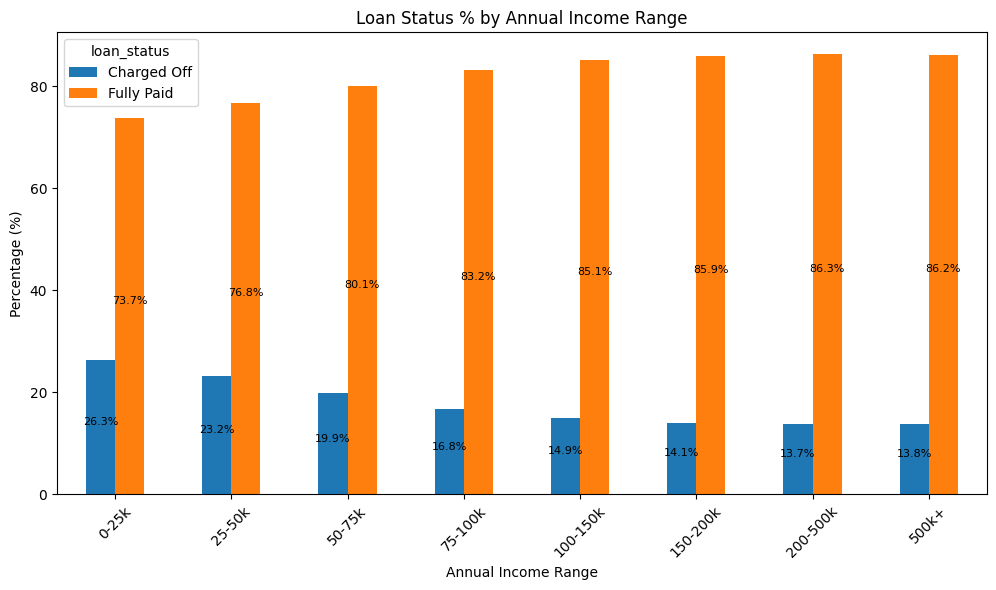

In [ ]:

# Create income bins
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 500000, df['annual_inc'].max()]
labels = ['0-25k', '25-50k', '50-75k', '75-100k', '100-150k', '150-200k', '200-500k', '500k+']
df['income_bin'] = pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True)

# Calculate percentage of loan_status within each income_bin
status_counts = df.groupby(['income_bin','loan_status']).size().unstack(fill_value=0)
status_pct = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Plot
ax = status_pct.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Loan Status % by Annual Income Range")
plt.ylabel("Percentage (%)")
plt.xlabel("Annual Income Range")
plt.xticks(rotation=45)
plt.legend(title="loan_status")

# Add percentage labels on bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # show only if >0
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=8, color='black')

plt.show()

For `Expericed` Vs `Annual income`

/tmp/ipython-input-1531449987.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['income_bin','emp_experience_level']).size().reset_index(name='count')


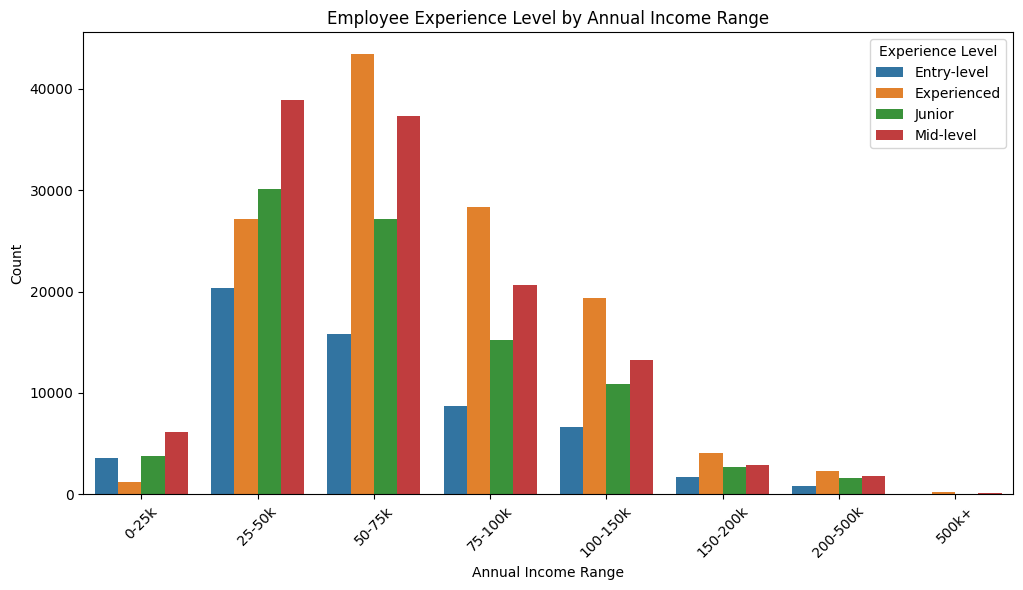

In [ ]:
# Step 1: Bin annual_inc
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 500000, df['annual_inc'].max()]
labels = ['0-25k', '25-50k', '50-75k', '75-100k', '100-150k', '150-200k', '200-500k', '500k+']
df['income_bin'] = pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Group and count
counts = df.groupby(['income_bin','emp_experience_level']).size().reset_index(name='count')

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='income_bin', y='count', hue='emp_experience_level')
plt.title("Employee Experience Level by Annual Income Range")
plt.xlabel("Annual Income Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Experience Level")
plt.show()

# Machine Learning

#### Creating New Df For Machine Learnig
- The Df is Cleaned version of the original Df

In [ ]:
# Features for ML
ml_features = [
    'loan_amnt', 'term', 'int_rate', 'installment',
    'emp_length', 'annual_inc', 'dti_capped',
    'open_acc', 'total_acc', 'pub_rec', 'pub_rec_bankruptcies',
    'revol_bal', 'revol_util', 'mort_acc', 'credit_history_length_capped',
    'grade', 'sub_grade', 'home_ownership', 'verification_status',
    'application_type', 'initial_list_status', 'purpose_grouped',
    'emp_experience_level', 'issue_year', 'issue_month', 'issue_quarter'
]

# Create new dataframe
df_ml = df[ml_features + ['loan_status']]  # loan_status = target


✅ Step 1: Split features & target

In [ ]:
X = df_ml.drop('loan_status', axis=1)
y = df_ml['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)   # 1 = Default, 0 = Fully Paid

✅ Step 2: Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


✅ Step 3: Preprocessing (encode + scale)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['loan_amnt','term','int_rate','installment',
                    'emp_length','annual_inc','dti_capped',
                    'open_acc','total_acc','pub_rec','pub_rec_bankruptcies',
                    'revol_bal','revol_util','mort_acc','credit_history_length_capped',
                    'issue_year','issue_month','issue_quarter']

categorical_features = ['grade','sub_grade','home_ownership',
                        'verification_status','application_type',
                        'initial_list_status','purpose_grouped',
                        'emp_experience_level']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


✅ Step 4: Logistic Regression model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])


✅ Step 5: Train & Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8060374214074691

Confusion Matrix:
 [[62913   758]
 [14605   930]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     63671
           1       0.55      0.06      0.11     15535

    accuracy                           0.81     79206
   macro avg       0.68      0.52      0.50     79206
weighted avg       0.76      0.81      0.74     79206



#### Using Smote In linear regression model

Accuracy: 0.6451783955760927

Confusion Matrix:
 [[40717 22954]
 [ 5150 10385]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74     63671
           1       0.31      0.67      0.42     15535

    accuracy                           0.65     79206
   macro avg       0.60      0.65      0.58     79206
weighted avg       0.77      0.65      0.68     79206



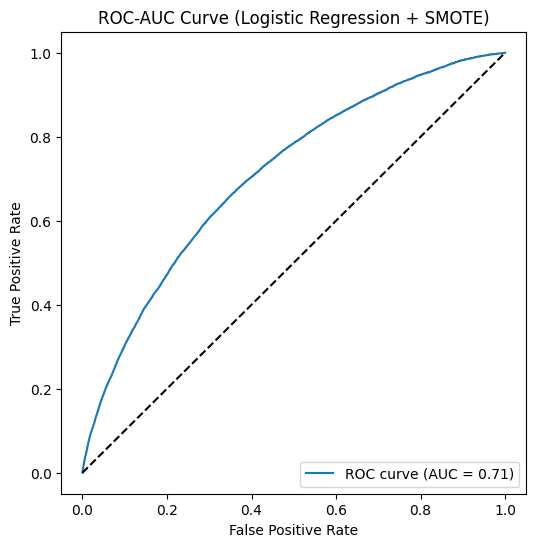

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Features & Target
# ---------------------------
X = df_ml.drop('loan_status', axis=1)
y = df_ml['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Step 2: Preprocessor
# ---------------------------
numeric_features = ['loan_amnt','term','int_rate','installment',
                    'emp_length','annual_inc','dti_capped',
                    'open_acc','total_acc','pub_rec','pub_rec_bankruptcies',
                    'revol_bal','revol_util','mort_acc','credit_history_length_capped',
                    'issue_year','issue_month','issue_quarter']

categorical_features = ['grade','sub_grade','home_ownership',
                        'verification_status','application_type',
                        'initial_list_status','purpose_grouped',
                        'emp_experience_level']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ---------------------------
# Step 3: Apply SMOTE
# ---------------------------
smote = SMOTE(random_state=42)

# First preprocess features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE on transformed features
X_res, y_res = smote.fit_resample(X_train_transformed, y_train)

# ---------------------------
# Step 4: Logistic Regression
# ---------------------------
clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_res, y_res)

# ---------------------------
# Step 5: Evaluation
# ---------------------------
y_pred = clf.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Curve
y_pred_prob = clf.predict_proba(X_test_transformed)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Logistic Regression + SMOTE)")
plt.legend(loc="lower right")
plt.show()


## For Randomn Forest

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Encode categorical features
cat_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status',
            'application_type', 'initial_list_status', 'purpose_grouped',
            'emp_experience_level']

le = LabelEncoder()

for col in cat_cols:
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Step 1: Ensure y is integer
# ---------------------------
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

X_train_np = X_train_enc.values
X_test_np = X_test_enc.values

# ---------------------------
# Step 2: Random Forest Classifier
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=300,   # number of trees
    max_depth=12,      # depth of each tree
    random_state=42,
    class_weight="balanced"   # handle imbalance
)

rf.fit(X_train_np, y_train_int)
y_pred = rf.predict(X_test_np)

# ---------------------------
# Step 3: Evaluation
# ---------------------------
print("Accuracy:", accuracy_score(y_test_int, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_int, y_pred))
print("\nClassification Report:\n", classification_report(y_test_int, y_pred))


Accuracy: 0.689846728783173

Confusion Matrix:
 [[44981 18690]
 [ 5876  9659]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79     63671
           1       0.34      0.62      0.44     15535

    accuracy                           0.69     79206
   macro avg       0.61      0.66      0.61     79206
weighted avg       0.78      0.69      0.72     79206



`LoanTap Default Prediction – Random Forest`

`📊 Confusion Matrix`
|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | 44,981      | 18,690      |
| **Actual 1**   | 5,876       | 9,659       |

`📈 Metrics`
- **Accuracy:** 68.98%  
- **Class 0 (Fully Paid):** Precision 0.88 | Recall 0.71 | F1 0.79  
- **Class 1 (Charged Off):** Precision 0.34 | Recall 0.62 | F1 0.44  

`🔎 Insight`
- Model is strong for **Fully Paid** loans.  
- For **Charged Off**, recall (0.62) is decent but precision (0.34) is low.  


## Using XG Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Step 1: Ensure y is integer
# ---------------------------
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

X_train_np = X_train_enc.values
X_test_np = X_test_enc.values

# ---------------------------
# Step 2: XGBoost Classifier
# ---------------------------
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=10,        # L2 regularization
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train_np, y_train_int)
y_pred = xgb.predict(X_test_np)

# ---------------------------
# Step 3: Evaluation
# ---------------------------
print("Accuracy:", accuracy_score(y_test_int, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_int, y_pred))
print("\nClassification Report:\n", classification_report(y_test_int, y_pred))


Accuracy: 0.8092694997853698

Confusion Matrix:
 [[62390  1281]
 [13826  1709]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     63671
           1       0.57      0.11      0.18     15535

    accuracy                           0.81     79206
   macro avg       0.70      0.54      0.54     79206
weighted avg       0.77      0.81      0.75     79206



`XGBoost Model Performance (Before SMOTE)`

- **Accuracy:** 80.9%

`Confusion Matrix`
|              | Predicted: 0 | Predicted: 1 |
|--------------|--------------|--------------|
| **Actual: 0** | 62,390       | 1,281        |
| **Actual: 1** | 13,826       | 1,709        |

`Classification Report`
- **Class 0 (Fully-Paid Customers):**
  - Precision: 0.82
  - Recall: 0.98
  - F1-score: 0.89  

- **Class 1 (Charged-Off Customers):**
  - Precision: 0.57
  - Recall: 0.11
  - F1-score: 0.18  

`Insights`
- The model performs very well in identifying **FUlly-Paid customers (Class 0)**.  
- However, it struggles to detect **Charged-Off customers (Class 1)** due to class imbalance.  
- High accuracy is mainly driven by correct predictions of the majority class.  
- Applying techniques like **SMOTE, class weighting, or threshold tuning** may help improve recall for churn cases.


#### After Applying Smote  In Xgboost model

In [ ]:
# Step 2: Apply SMOTE
# ---------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_np, y_train_int)
# ---------------------------
# Step 4: Predictions with threshold tuning
# ---------------------------
y_pred_prob = xgb.predict_proba(X_test_np)[:, 1]      # probability for class 1
y_pred_new = (y_pred_prob >= 0.4).astype(int)

print("Before SMOTE:", dict(zip(*np.unique(y_train_int, return_counts=True))))

print("After SMOTE:", dict(zip(*np.unique(y_train_res, return_counts=True))))
# ---------------------------
# Step 3: XGBoost Classifier
# ---------------------------
xgb2 = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=10,
    random_state=42,
    eval_metric="logloss",
    scale_pos_weight=4.1
)

xgb2.fit(X_train_res, y_train_res)   # Training with SMOTE data
y_pred = xgb2.predict(X_test_np)

# ---------------------------
# Step 4: Evaluation
# ---------------------------
print("Accuracy:", accuracy_score(y_test_int, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_int, y_pred))
print("\nClassification Report:\n", classification_report(y_test_int, y_pred))

Before SMOTE: {np.int64(0): np.int64(254686), np.int64(1): np.int64(62138)}
After SMOTE: {np.int64(0): np.int64(254686), np.int64(1): np.int64(254686)}
Accuracy: 0.6690275989192738

Confusion Matrix:
 [[42533 21138]
 [ 5077 10458]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76     63671
           1       0.33      0.67      0.44     15535

    accuracy                           0.67     79206
   macro avg       0.61      0.67      0.60     79206
weighted avg       0.78      0.67      0.70     79206



`📊 XGBoost Model Performance (LoanTap: Fully Paid vs Charged Off)`

`⚖️ Class Distribution`
- **Before SMOTE:** {Fully Paid: 254,686 , Charged Off: 62,138}  
- **After SMOTE:** {Fully Paid: 254,686 , Charged Off: 254,686} (balanced dataset)

---

✅ Model Results (Threshold = 0.4)
- **Accuracy:** 66.9%

**Confusion Matrix:**
- [[42533 21138] → True Negatives (Fully Paid correctly predicted)
- [ 5077 10458]] → True Positives (Charged Off correctly predicted)

---

`📌 Classification Report`
| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|-----------|----------|
| 0 (Fully Paid) | 0.89 | 0.67 | 0.76 | 63,671 |
| 1 (Charged Off) | 0.33 | 0.67 | 0.44 | 15,535 |

- **Macro Avg F1:** 0.60  
- **Weighted Avg F1:** 0.70  

---

`🔎 Key Insights`
- Model achieves **good recall for Charged Off loans (0.67)** → successfully flags risky loans.  
- **Precision for Charged Off loans is low (0.33)** → many false alarms (predicting default when loan is actually paid).  
- Overall accuracy is **66.9%**, but model is now **more effective at identifying defaults** which is critical for financial risk management.  
- Next step: Fine-tune threshold further, or apply **cost-sensitive learning** since missing a default is costlier than a false positive.


# 🏁 Final Conclusion – LoanTap Churn Prediction

- The dataset was **highly imbalanced** (Fully Paid >> Charged Off), so **SMOTE oversampling** was applied to balance classes.  
- **XGBoost** (after SMOTE) gave ~67% accuracy with good recall (0.67) for Charged Off loans but low precision (0.33).  
- **Random Forest** achieved ~69% accuracy with recall (0.62) for Charged Off and slightly better overall balance.  
- Both models are **good at identifying defaulters** (high recall) but suffer from **low precision**, leading to more false alarms.  
- For a financial context, this trade-off is acceptable since catching risky borrowers is more important than wrongly flagging some safe ones.  

⚡ **Overall:** The models provide a **strong baseline** for risk detection in LoanTap.